#  Correlation of Lightning Strike Intensity and Polarity in 2021 British Columbia PyroCb Event

### AOS 90: Final Project Code
### Elena Dworak 
### Feb 27 2022 

### Load in packages and data 
The .mat file has the actual data. The “events” variable has GLD360 data. The first 9 columns are year/month/day/hour/minute/second/lat/lon/peak-current.

In [7]:
import numpy as np
from datetime import datetime
import matplotlib.pyplot as plt
import metpy  # noqa: F401
import xarray
import pandas as pd
import scipy.stats as ss 

import cartopy
import cartopy.crs as ccrs
import cartopy.feature as cfeature

#from celluloid import Camera
from IPython.display import HTML
#import ffmpeg
#from matplotlib import animation, rc
#from matplotlib import animation, rc
from pymatreader import read_mat
import matplotlib.patches as mpatches

#from shapely import geometry
import os
import math
from shapely import geometry

# animation imports 
from celluloid import Camera
from IPython.display import HTML
import ffmpeg
from matplotlib import animation, rc
import matplotlib.patches as mpatches
from shapely import geometry

from textwrap import wrap


## import GLD360 data (june 28 - july 1)

In [8]:
# A["Events"] is for the structure in matlab file

A = read_mat('/data/edworak/data/2021-06-28-Bortnik.mat')
df_a = pd.DataFrame(A['Events'], columns = ["year", "month", "day", "hour", "minute", "second", "lat", "lon", "peak-current", "j",  "k", "l", "m"])

#select all columns except last four 
june28 = df_a.loc[:, ~df_a.columns.isin(["j",  "k", "l", "m"])]

B = read_mat('/data/edworak/data/2021-06-29-Bortnik.mat')
df_b = pd.DataFrame(B['Events'], columns = ["year", "month", "day", "hour", "minute", "second", "lat", "lon", "peak-current", "j",  "k", "l", "m"])
june29 = df_b.loc[:, ~df_b.columns.isin(["j",  "k", "l", "m"])]

C = read_mat('/data/edworak/data/2021-06-30-Bortnik.mat')
df_c = pd.DataFrame(C['Events'], columns = ["year", "month", "day", "hour", "minute", "second", "lat", "lon", "peak-current", "j",  "k", "l", "m"])
june30 = df_c.loc[:, ~df_c.columns.isin(["j",  "k", "l", "m"])]

D = read_mat('/data/edworak/data/2021-07-01-Bortnik.mat')
df_d = pd.DataFrame(D['Events'], columns = ["year", "month", "day", "hour", "minute", "second", "lat", "lon", "peak-current", "j",  "k", "l", "m"])
july1 = df_d.loc[:, ~df_d.columns.isin(["j",  "k", "l", "m"])]


lightning = (june28, june29, june30, july1)
lightning[0]["peak-current"].min()
lightning[0]["peak-current"].max()
#print(june29.dtypes)

frames = [june29, june30, july1]
whole_concat = pd.concat(frames)
whole_concat

,year,month,day,hour,minute,second,lat,lon,peak-current
0,2021.0,6.0,29.0,0.0,0.0,0.999711,58.008667,-122.242737,6.0
1,2021.0,6.0,29.0,0.0,0.0,14.823615,57.929129,-122.399080,5.0
2,2021.0,6.0,29.0,0.0,0.0,25.336774,58.044840,-122.300274,-2.0
3,2021.0,6.0,29.0,0.0,0.0,25.574771,58.018106,-122.384231,-15.0
4,2021.0,6.0,29.0,0.0,0.0,25.591675,57.988811,-122.392837,6.0
...,...,...,...,...,...,...,...,...,...
802165,2021.0,7.0,1.0,23.0,59.0,56.824909,45.922268,-116.690831,5.0
802166,2021.0,7.0,1.0,23.0,59.0,56.964276,55.191186,-119.930294,7.0
802167,2021.0,7.0,1.0,23.0,59.0,57.925225,50.564143,-117.615571,3.0
802168,2021.0,7.0,1.0,23.0,59.0,58.699633,54.381751,-119.048094,7.0


In [9]:
frames = [june28, june29, june30, july1]
all_days_concat = pd.concat(frames)
all_days_concat

,year,month,day,hour,minute,second,lat,lon,peak-current
0,2021.0,6.0,28.0,0.0,14.0,47.056748,50.155087,-102.721578,-9.0
1,2021.0,6.0,28.0,0.0,14.0,47.056927,50.153628,-102.722275,-21.0
2,2021.0,6.0,28.0,0.0,14.0,47.056963,50.155838,-102.719836,-9.0
3,2021.0,6.0,28.0,0.0,14.0,47.057129,50.153755,-102.721025,-12.0
4,2021.0,6.0,28.0,0.0,14.0,47.057211,50.154096,-102.683930,-10.0
...,...,...,...,...,...,...,...,...,...
802165,2021.0,7.0,1.0,23.0,59.0,56.824909,45.922268,-116.690831,5.0
802166,2021.0,7.0,1.0,23.0,59.0,56.964276,55.191186,-119.930294,7.0
802167,2021.0,7.0,1.0,23.0,59.0,57.925225,50.564143,-117.615571,3.0
802168,2021.0,7.0,1.0,23.0,59.0,58.699633,54.381751,-119.048094,7.0


## GLD360 July 1 0 UTC - 3 UTC 


/home/elenadworak/anaconda3/envs/mynewenv/lib/python3.8/site-packages/pandas/core/arraylike.py:397: RuntimeWarning: invalid value encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)
/home/elenadworak/anaconda3/envs/mynewenv/lib/python3.8/site-packages/matplotlib/collections.py:981: RuntimeWarning: invalid value encountered in sqrt
  scale = np.sqrt(self._sizes) * dpi / 72.0 * self._factor


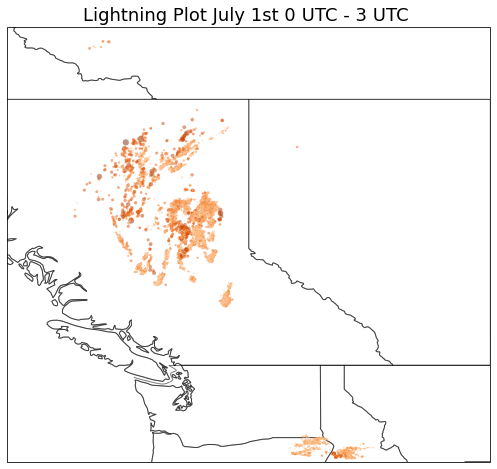

In [4]:
ax = plt.axes(projection=ccrs.PlateCarree())
ax.add_feature(cfeature.BORDERS, linestyle = '-', alpha = 0.5)
ax.add_feature(cfeature.COASTLINE, linestyle = '-', alpha = 0.5)
ax.add_feature(cfeature.STATES, linestyle = '-', alpha = 0.5, edgecolor="black")

# Make figure larger
plt.gcf().set_size_inches(12, 8)
plt.xlim([-130, -110])
plt.ylim([45, 63])

points = (july1.loc[(july1["peak-current"] != 0) & (july1["hour"] >= 0.0) & (july1["hour"] <= 3.0)])

ax.scatter(x = points["lon"], y = points["lat"], c = np.log(points["peak-current"]), cmap="Oranges", s = points["peak-current"] * 0.2, edgecolors="none", marker = 'o', alpha=0.5)#, label = "Climatology")

plt.xlabel("Latitude")
plt.ylabel("Longitude")
plt.title("Lightning Plot July 1st 0 UTC - 3 UTC ", fontsize = 18)
#plt.savefig("PyroCb_clima_0utc_3utc", dpi = 200)
plt.show()



## Plotting pyrocb and clima regions July 1 0 UTC - 3 UTC
- green climatology
- purple pyrocb

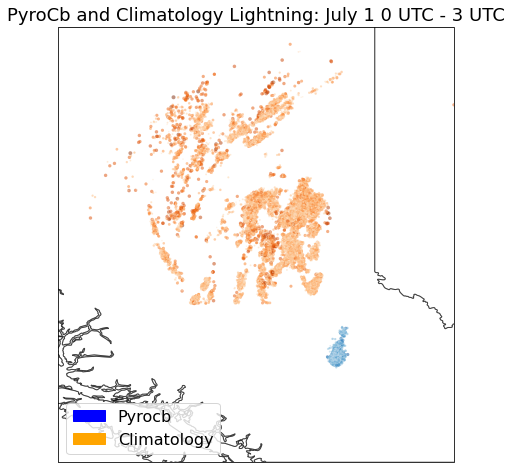

In [5]:
ax = plt.axes(projection=ccrs.PlateCarree())
ax.add_feature(cfeature.BORDERS, linestyle = '-', alpha = 0.5)
ax.add_feature(cfeature.COASTLINE, linestyle = '-', alpha = 0.5)
ax.add_feature(cfeature.STATES, linestyle = '-', alpha = 0.5, edgecolor="black")

# Make figure larger
plt.gcf().set_size_inches(12, 8)
plt.xlim([-128, -118])
plt.ylim([49, 60])


points_pyrocb = (july1.loc[(july1.lon > -122) & (july1.lon < -119) & (july1.lat > 48) & (july1.lat < 53) & (july1["peak-current"] != 0) & (july1["hour"] >= 0.0) & (july1["hour"] <= 3.0)])
points_clima = (july1.loc[(july1.lon > -130) & (july1.lon < -110) & (july1.lat > 53) & (july1.lat < 60) & (july1["peak-current"] != 0) & (july1["hour"] >= 0.0) & (july1["hour"] <= 3.0)])

ax.scatter(x = points_clima["lon"], y = points_clima["lat"], c = np.log(points_clima["peak-current"]), cmap="Oranges", s = np.log(points_clima["peak-current"]) * 3, edgecolors="none", marker = 'o', alpha=0.5)
ax.scatter(x = points_pyrocb["lon"], y = points_pyrocb["lat"], c = np.log(points_pyrocb["peak-current"]), cmap="Blues", s = np.log(points_pyrocb["peak-current"]) * 3, edgecolors="none", marker = 'o', alpha=0.5)

purple_patch = mpatches.Patch(color='blue', label='Pyrocb')
green_patch = mpatches.Patch(color='orange', label='Climatology')
plt.legend(handles=[purple_patch, green_patch], fontsize = 16)


plt.xlabel("Latitude")
plt.ylabel("Longitude")
plt.title("PyroCb and Climatology Lightning: July 1 0 UTC - 3 UTC", fontsize = 18)
plt.savefig("regionvisual_PyroCb_clima_03utc", dpi = 200)
plt.show()



## GLD360 Testing number of strikes, current, percent positive 
### Pyrocb 
-  testing number of lightning strikes and average polarity for typical thunderstorm lightning / pyrocbtology
-  tests for each of the four days 

In [10]:
num_strikes_pyrocb = np.zeros(4)
strikes_greater_30_pyrocb = np.zeros(4)
percent_pos_greater_30_pyrocb = np.zeros(4)
mean_current_pyrocb = np.zeros(4)
mean_pos_current_pyrocb = np.zeros(4)
mean_neg_current_pyrocb = np.zeros(4)
percent_pos_current_pyrocb = np.zeros(4)
pos_over_neg_pyrocb = np.zeros(9)

def strikes_current_pyrocb(df):
    for i in range(0,4):
        strikes_pyrocb = (df[i].loc[(df[i]["lon"] > -121.5) & (df[i]["lon"] < -119) & (df[i]["lat"] > 51) & (df[i]["lat"] < 53)])
        #print(len(strikes_pyrocb))
        num_strikes_pyrocb[i] = len(strikes_pyrocb)
        mean_current_pyrocb[i] = (abs(strikes_pyrocb["peak-current"])).mean()
        pos_current_pyrocb = strikes_pyrocb.loc[(strikes_pyrocb["peak-current"] > 0)]
        #print(len(pos_current_pyrocb))
        mean_pos_current_pyrocb[i] = pos_current_pyrocb["peak-current"].mean()
        neg_current_pyrocb = strikes_pyrocb.loc[(strikes_pyrocb["peak-current"] < 0)]
        mean_neg_current_pyrocb[i] = neg_current_pyrocb["peak-current"].mean()
        strikes_greater_30_pyrocb = strikes_pyrocb.loc[(strikes_pyrocb["peak-current"] > 30)]
        if len(strikes_pyrocb) > 2: 
            #percent_pos_current_pyrocb[i] = (len(pos_current_pyrocb["peak-current"]) / len(strikes_pyrocb)) * 100
            percent_pos_current_pyrocb[i] = (len(pos_current_pyrocb) / len(strikes_pyrocb)) * 100
            pos_over_neg_pyrocb[i] = (len(pos_current_pyrocb) / len(neg_current_pyrocb)) 
            # test over number negative strikes 
            percent_pos_greater_30_pyrocb[i] = (len(strikes_greater_30_pyrocb)/len(strikes_pyrocb))* 100 
    return(num_strikes_pyrocb, mean_current_pyrocb, mean_pos_current_pyrocb, mean_neg_current_pyrocb, pos_over_neg_pyrocb, strikes_greater_30_pyrocb, percent_pos_greater_30_pyrocb)



In [11]:
strikes_current_pyrocb(lightning)

print("Number of lightning strikes June 28: {:.0f} strikes, June 29: {:.0f} strikes, June 30: {:.0f} strikes, July 1: {:.0f} strikes".format(num_strikes_pyrocb[0], num_strikes_pyrocb[1], num_strikes_pyrocb[2], num_strikes_pyrocb[3]))
print("Average current June 28: {:.4f} , June 29: {:.4f} , June 30: {:.4f} , July 1: {:.4f} ".format(mean_current_pyrocb[0], mean_current_pyrocb[1], mean_current_pyrocb[2], mean_current_pyrocb[3]))
print("Average positive polarity June 28: {:.4f} , June 29: {:.4f} , June 30: {:.4f} , July 1: {:.4f} ".format(mean_pos_current_pyrocb[0], mean_pos_current_pyrocb[1], mean_pos_current_pyrocb[2], mean_pos_current_pyrocb[3]))
print("Average negative polarity June 28: {:.4f} , June 29: {:.4f} , June 30: {:.4f} , July 1: {:.4f} ".format(mean_neg_current_pyrocb[0], mean_neg_current_pyrocb[1], mean_neg_current_pyrocb[2], mean_neg_current_pyrocb[3]))
print("Percent of positive lightning strikes June 28: {:.2f}% , June 29: {:.2f}% , June 30: {:.2f}% , July 1: {:.2f}%".format(percent_pos_current_pyrocb[0],percent_pos_current_pyrocb[1],percent_pos_current_pyrocb[2],percent_pos_current_pyrocb[3]))
print("Percent positive over negative strikes ratio June 28: {:.2f} , June 29: {:.2f} , June 30: {:.2f} , July 1: {:.2f}".format(pos_over_neg_pyrocb[0], pos_over_neg_pyrocb[1], pos_over_neg_pyrocb[2], pos_over_neg_pyrocb[3]))



Number of lightning strikes June 28: 0 strikes, June 29: 0 strikes, June 30: 1022 strikes, July 1: 5948 strikes
Average current June 28: nan , June 29: nan , June 30: 8.6037 , July 1: 7.0787 
Average positive polarity June 28: nan , June 29: nan , June 30: 5.7792 , July 1: 5.5528 
Average negative polarity June 28: nan , June 29: nan , June 30: -11.7557 , July 1: -9.8994 
Percent of positive lightning strikes June 28: 0.00% , June 29: 0.00% , June 30: 52.74% , July 1: 64.90%
Percent positive over negative strikes ratio June 28: 0.00 , June 29: 0.00 , June 30: 1.12 , July 1: 1.85


### Climatology
- testing number of lightning strikes and average polarity for typical thunderstorm lightning / climatology
- tests for each of the four days 


In [8]:
num_strikes_clima = np.zeros(4)
strikes_greater_30_clima = np.zeros(4)
percent_pos_greater_30_clima = np.zeros(4)
mean_current_clima = np.zeros(4)
mean_pos_current_clima = np.zeros(4)
mean_neg_current_clima = np.zeros(4)
percent_pos_current_clima = np.zeros(4)
pos_over_neg_clima = np.zeros(9)

def strikes_current_clima(df):
    for i in range(0,4):
        strikes_clima = (df[i].loc[(df[i]["lon"] > -120) & (df[i]["lon"] < -100) & (df[i]["lat"] > 53) & (df[i]["lat"] < 60)])
        #print(len(strikes_clima))
        num_strikes_clima[i] = len(strikes_clima)
        mean_current_clima[i] = (abs(strikes_clima["peak-current"])).mean()
        pos_current_clima = strikes_clima.loc[(strikes_clima["peak-current"] > 0)]
        #print(len(pos_current_clima))
        mean_pos_current_clima[i] = pos_current_clima["peak-current"].mean()
        neg_current_clima = strikes_clima.loc[(strikes_clima["peak-current"] < 0)]
        mean_neg_current_clima[i] = neg_current_clima["peak-current"].mean()
        strikes_greater_30_clima = strikes_clima.loc[(strikes_clima["peak-current"] > 30)]
        percent_pos_greater_30_clima[i] = (len(strikes_greater_30_clima)/len(strikes_clima))* 100 
        
        if len(strikes_clima)!= 0: 
            percent_pos_current_clima[i] = (len(pos_current_clima["peak-current"]) / len(strikes_clima)) * 100
            pos_over_neg_clima[i] = (len(pos_current_clima) / len(neg_current_clima)) 

    return(num_strikes_clima, mean_current_clima, mean_pos_current_clima, mean_neg_current_clima, strikes_greater_30_clima, percent_pos_greater_30_clima)


In [9]:
strikes_current_clima(lightning)

print("Number of lightning strikes June 28: {:.0f} strikes, June 29: {:.0f} strikes, June 30: {:.0f} strikes, July 1: {:.0f} strikes".format(num_strikes_clima[0], num_strikes_clima[1], num_strikes_clima[2], num_strikes_clima[3]))
print("Average current June 28: {:.4f} , June 29: {:.4f} , June 30: {:.4f} , July 1: {:.4f} ".format(mean_current_clima[0], mean_current_clima[1], mean_current_clima[2], mean_current_clima[3]))
print("Average positive polarity June 28: {:.4f} , June 29: {:.4f} , June 30: {:.4f} , July 1: {:.4f} ".format(mean_pos_current_clima[0], mean_pos_current_clima[1], mean_pos_current_clima[2], mean_pos_current_clima[3]))
print("Average negative polarity June 28: {:.4f} , June 29: {:.4f} , June 30: {:.4f} , July 1: {:.4f} ".format(mean_neg_current_clima[0], mean_neg_current_clima[1], mean_neg_current_clima[2], mean_neg_current_clima[3]))
print("Percent of positive lightning strikes June 28: {:.2f}% , June 29: {:.2f}% , June 30: {:.2f}% , July 1: {:.2f}%".format(percent_pos_current_clima[0],percent_pos_current_clima[1],percent_pos_current_clima[2],percent_pos_current_clima[3]))
print("Percent of positive lightning strikes with peak current > +30 J June 28: {:.4f}% , June 29: {:.4f}% , June 30: {:.4f}% , July 1: {:.4f}%".format(percent_pos_greater_30_clima[0],percent_pos_greater_30_clima[1],percent_pos_greater_30_clima[2],percent_pos_greater_30_clima[3]))
print("Percent positive over negative strikes ratio June 28: {:.2f} , June 29: {:.2f} , June 30: {:.2f} , July 1: {:.2f}".format(pos_over_neg_clima[0], pos_over_neg_clima[1], pos_over_neg_clima[2], pos_over_neg_clima[3]))


Number of lightning strikes June 28: 39766 strikes, June 29: 211060 strikes, June 30: 671 strikes, July 1: 291734 strikes
Average current June 28: 9.4794 , June 29: 9.0611 , June 30: 5.5097 , July 1: 6.7308 
Average positive polarity June 28: 6.3238 , June 29: 6.3991 , June 30: 6.3536 , July 1: 6.0204 
Average negative polarity June 28: -12.7304 , June 29: -12.9807 , June 30: -4.5210 , July 1: -8.4069 
Percent of positive lightning strikes June 28: 50.74% , June 29: 59.55% , June 30: 53.95% , July 1: 70.23%
Percent of positive lightning strikes with peak current > +30 J June 28: 1.4585% , June 29: 0.9874% , June 30: 3.4277% , July 1: 0.8292%
Percent positive over negative strikes ratio June 28: 1.03 , June 29: 1.47 , June 30: 1.17 , July 1: 2.36


## For loops to get ten minute intervals 

### Ten minute intervals 

In [10]:
### same code but different

# take the 20 UTC June 30 to 6 UTC July 1 time interval 
# use function strikes_current_pyrocb to get the polarities and positive lightning percentage 

hours = [21.0, 22.0, 23.0, 0.0, 1.0, 2.0, 3.0, 4.0, 5.0]
mins = range(0, 60, 10)

num_strikes_pyrocb1 = np.zeros((len(hours), len(mins)))
mean_current_pyrocb1 = np.zeros((len(hours), len(mins)))
mean_pos_current_pyrocb1 = np.zeros((len(hours), len(mins)))
mean_neg_current_pyrocb1 = np.zeros((len(hours), len(mins)))
percent_pos_current_pyrocb1 = np.zeros((len(hours), len(mins)))
num_pos_current_pyrocb1 =  np.zeros((len(hours), len(mins)))
num_neg_current_pyrocb1 =  np.zeros((len(hours), len(mins)))
#peak_current_pyrocb1 = np.zeros((len(hours), len(mins)))

num_strikes_clima1 = np.zeros((len(hours), len(mins)))
mean_current_clima1 = np.zeros((len(hours), len(mins)))
mean_pos_current_clima1 = np.zeros((len(hours), len(mins)))
mean_neg_current_clima1 = np.zeros((len(hours), len(mins)))
percent_pos_current_clima1 = np.zeros((len(hours), len(mins)))
num_pos_current_clima1 = np.zeros((len(hours), len(mins)))
num_neg_current_clima1 = np.zeros((len(hours), len(mins)))


# ten minute time interval 
# use the concat data set instead 
def strikes_current_combined(df):
    for i in range(len(hours)): 
        for j in range(len(mins)): 
            time = df[(df["hour"] == hours[i]) & (df["minute"] >= mins[j]) & (df["minute"] <= mins[j] + 9) & (df["peak-current"] != 0)]
            #print(time)
        ### doing for pyrocb ### 
            strikes_pyrocb1 = (time.loc[(time["lon"] >= -122) & (time["lon"] <= -119) & (time["lat"] >= 50) & (time["lat"] <= 53)])
            #print(strikes_pyrocb1)
            if len(strikes_pyrocb1) >= 1: 
                #peak_current_pyrocb1[i,j] = strikes_pyrocb1["peak-current"]
                
                num_strikes_pyrocb1[i,j] = len(strikes_pyrocb1)
                mean_current_pyrocb1[i,j] = (abs(strikes_pyrocb1["peak-current"])).mean()

                #positive pyrocb                
                pos_current_pyrocb1 = strikes_pyrocb1.loc[(strikes_pyrocb1["peak-current"] > 0)]
                num_pos_current_pyrocb1[i,j] = len(pos_current_pyrocb1)
                mean_pos_current_pyrocb1[i,j] = pos_current_pyrocb1["peak-current"].mean()
                
                #negative pyrocb
                neg_current_pyrocb1 = strikes_pyrocb1.loc[(strikes_pyrocb1["peak-current"] < 0)]
                num_neg_current_pyrocb1[i,j] = len(neg_current_pyrocb1)
                #global mean_neg_current_pyrocb1
                mean_neg_current_pyrocb1[i,j] = neg_current_pyrocb1["peak-current"].mean()
                
                #strikes_greater_30_pyrocb1 = strikes_pyrocb1.loc[(strikes_pyrocb1["peak-current"] > 30)]
                if len(strikes_pyrocb1)> 2: 
                    percent_pos_current_pyrocb1[i,j] = (len(pos_current_pyrocb1["peak-current"]) / len(strikes_pyrocb1)) * 100

        ### doing for climatology
            strikes_clima1 = (time.loc[(time["lon"] > -130) & (time["lon"] < -100) & (time["lat"] >= 53) & (time["lat"] < 65)])
            if len(strikes_clima1) >= 1: 
                num_strikes_clima1[i,j] = len(strikes_clima1)
                
                #positive clima 
                mean_current_clima1[i,j] = (abs(strikes_clima1["peak-current"])).mean()
                pos_current_clima1 = strikes_clima1.loc[(strikes_clima1["peak-current"] > 0)]
                num_pos_current_clima1[i,j] = len(pos_current_clima1)
                mean_pos_current_clima1[i,j] = pos_current_clima1["peak-current"].mean()

                #negative clima
                neg_current_clima1 = strikes_clima1.loc[(strikes_clima1["peak-current"] < 0)]
                num_neg_current_clima1[i,j] = len(neg_current_clima1)
                mean_neg_current_clima1[i,j] = neg_current_clima1["peak-current"].mean()
                
                #strikes_greater_30_clima1 = strikes_clima1.loc[(strikes_clima1["peak-current"] > 30)]
                if len(strikes_clima1)> 2: 
                    percent_pos_current_clima1[i,j] = (len(pos_current_clima1["peak-current"]) / len(strikes_clima1)) * 100
               
   
    return(num_strikes_pyrocb1, mean_current_pyrocb1, mean_pos_current_pyrocb1, mean_neg_current_pyrocb1, percent_pos_current_pyrocb1,  
        num_strikes_clima1, mean_current_clima1, mean_pos_current_clima1, mean_neg_current_clima1, percent_pos_current_clima1, 
            num_pos_current_pyrocb1, num_neg_current_pyrocb1, num_pos_current_clima1, num_neg_current_clima1) #peak_current_pyrocb1


- 0: num_strikes_pyrocb1
- 1: mean_current_pyrocb1
- 2: mean_pos_current_pyrocb1
- 3: mean_neg_current_pyrocb1
- 4: percent_pos_current_pyrocb1  
- 5: num_strikes_clima1
- 6: mean_current_clima1
- 7: mean_pos_current_clima1
- 8: mean_neg_current_clima1
- 9: percent_pos_current_clima1
- 10: num_pos_current_pyrocb1
- 11: num_neg_current_pyrocb1
- 12: num_pos_current_clima1
- 13: num_neg_current_clima1
- 14: peak_current_pyrocb1

### print percent pos current pyrocb
### hours and index: 
- 21: 0
- 22: 1
- 23: 2
- 00: 3
- 01: 4
- 02: 5
- 03: 6
- 04: 7
- 05: 8

In [11]:
# june 30 hour 21 to july 1 hour 5

june30_21to24 = june30[(june30["hour"] >= 21) & (june30["hour"] <= 24)]
july1_0to5 = july1[(july1["hour"] >= 0) & (july1["hour"] <= 5.0)]

frames = [june30_21to24, july1_0to5]
june30_july1_concat = pd.concat(frames)


### making each variable 'flat' to iterate through more easily need be

In [12]:
#regular_list = [[1, 2, 3, 4], [5, 6, 7], [8, 9]]
# flat_list = [1, 2, 3, 4, 5, 6, 7, 8, 9]

num_strikes_pyrocb = strikes_current_combined(june30_july1_concat)[0]
flat_num_strikes_pyrocb = [item for sublist in num_strikes_pyrocb for item in sublist]

mean_current_pyrocb = strikes_current_combined(june30_july1_concat)[1]
flat_mean_current_pyrocb = [item for sublist in mean_current_pyrocb for item in sublist]

mean_current_clima = strikes_current_combined(june30_july1_concat)[6]
flat_mean_current_clima = [item for sublist in mean_current_clima for item in sublist]

mean_pos_current_pyrocb = strikes_current_combined(june30_july1_concat)[2]
flat_mean_pos_current_pyrocb = [item for sublist in mean_pos_current_pyrocb for item in sublist]

mean_neg_current_pyrocb = strikes_current_combined(june30_july1_concat)[3]
flat_mean_neg_current_pyrocb = [item for sublist in mean_neg_current_pyrocb for item in sublist]


mean_pos_current_clima = strikes_current_combined(june30_july1_concat)[7]
flat_mean_pos_current_clima = [item for sublist in mean_pos_current_clima for item in sublist]

mean_neg_current_clima = strikes_current_combined(june30_july1_concat)[8]
flat_mean_neg_current_clima = [item for sublist in mean_neg_current_clima for item in sublist]

percent_pos_pyrocb = strikes_current_combined(june30_july1_concat)[4]
flat_percent_pos_pyrocb = [item for sublist in percent_pos_pyrocb for item in sublist]

percent_pos_clima = strikes_current_combined(june30_july1_concat)[9]
flat_percent_pos_clima = [item for sublist in percent_pos_clima for item in sublist]

num_pos_current_pyrocb = strikes_current_combined(june30_july1_concat)[10]
flat_num_pos_current_pyrocb = [item for sublist in num_pos_current_pyrocb for item in sublist]

num_neg_current_pyrocb = strikes_current_combined(june30_july1_concat)[11]
flat_num_neg_current_pyrocb = [item for sublist in num_neg_current_pyrocb for item in sublist]

num_pos_current_clima = strikes_current_combined(june30_july1_concat)[12]
flat_num_pos_current_clima = [item for sublist in num_pos_current_clima for item in sublist]

num_neg_current_clima = strikes_current_combined(june30_july1_concat)[13]
flat_num_neg_current_clima = [item for sublist in num_neg_current_clima for item in sublist]


# Statistical tests
A hypothesis test with p-value and interpretation of the p-value.
Testing the polarity vs the peak current for within the pyrocb region, and for climatology/ outside of the pyrocb region. <br>

- null hypothesis:  Pyrocb region has lower probability of positive polarity lightning than typical thunderstorms 
- alternative hypothesis: Pyrocb region has higher probability of positive polarity lightning than typical thunderstorms

null hypothesis = $\mu_{pyrocb}$ <= $\mu_{clima}$ <br>
alternative hypothesis = $\mu_{pyrocb}$ > $\mu_{clima}$ <br>

- t test wil be more accurate since the sample size is less than 30

In [13]:
# z score function 
# two sample z test 
# use a z test if probability of positive lightning is greater for pyrocb or climatology 
# two sample z test: mean x - mean y/ sqrt(std x**2/length x+ std y** 2/length y)

def two_sample_zscore(pop_1_values, pop_2_values, pop_1_mean, pop_2_mean, pop_1_std, pop_2_std):
    two_sample_z_score = (((pop_2_mean - pop_1_mean)- (0))/ (math.sqrt(((pop_1_std ** 2)/ len(pop_1_values))+((pop_2_std ** 2)/ len(pop_2_values)))))
    return two_sample_z_score
                          


In [14]:
# overall z test and t test 
#pyrocb mean - clima mean for null, so pop 2 is x2 clima is x1

#Perform the z-test here: 
zscore = two_sample_zscore(flat_percent_pos_clima, flat_percent_pos_pyrocb, np.mean(flat_percent_pos_clima), np.mean(flat_percent_pos_pyrocb), np.std(flat_percent_pos_clima), np.std(flat_percent_pos_pyrocb))
pvalue = ss.norm.sf(abs(zscore))
print("Z score:{:.4f}, P value:{:.4f}%".format(zscore, pvalue*100))

#Perform the t-test here:
t_test = ss.ttest_ind(flat_percent_pos_pyrocb, flat_percent_pos_clima)
print("T score: {:.4f}, P value: {:.4f}%".format(t_test[0], t_test[1] * 100))  

Z score:-5.4135, P value:0.0000%
T score: -5.3631, P value: 0.0000%


### z test for pos and neg values of pyrocb

In [15]:
# population 1 should be larger value

# a lot more probable that climatology positive lightning has higher value than negative lightning? 

#Perform the z-test here: 
zscore1 = two_sample_zscore(np.abs(flat_mean_neg_current_pyrocb), flat_mean_pos_current_pyrocb, np.mean(np.abs(flat_mean_neg_current_pyrocb)), np.mean(flat_mean_pos_current_pyrocb), np.std(np.abs(flat_mean_neg_current_pyrocb)), np.std(flat_mean_pos_current_pyrocb))
pvalue1 = ss.norm.sf(abs(zscore1))
print("Pyrocb Z score:{:.4f}, P value:{:.4f}%".format(zscore1, pvalue1*100))

zscore2 = two_sample_zscore(np.abs(flat_mean_neg_current_clima), flat_mean_pos_current_clima, np.mean(np.abs(flat_mean_neg_current_clima)), np.mean(flat_mean_pos_current_clima), np.std(np.abs(flat_mean_neg_current_clima)), np.std(flat_mean_pos_current_clima))
pvalue2 = ss.norm.sf(abs(zscore2))
print("Clima Z score:{:.4f}, P value:{:.4f}%".format(zscore2, pvalue2*100))

#Perform the t-test here:
#t_test = ss.ttest_ind(flat_mean_pos_current_pyrocb, flat_mean_neg_current_pyrocb)
#print("T score: {:.4f}, P value: {:.4f}%".format(t_test[0], t_test[1] * 100))  


Pyrocb Z score:nan, P value:nan%
Clima Z score:-2.8222, P value:0.2385%


### looped z-score function 

In [16]:
# df1 is clima, df2 is pyrocb 
# z test and t test for each of the 10 minute intervals within the three hours where pyrocb and clima have data 

ztest_values = np.zeros(9)
pvalue_ztest = np.zeros(9)
ttest_values = np.zeros(9)
pvalue_ttest = np.zeros(9)

def looped_zscore(df1, df2):
    for i in range(2,5,1):  
            pop_1_values = df1[i]
            pop_2_values = df2[i]
            pop_1_mean = np.mean(df1[i])
            pop_2_mean = np.mean(df2[i])
            pop_1_std = np.std(df1[i])
            pop_2_std = np.std(df2[i])
            ztest_values[i] = two_sample_zscore(pop_1_values, pop_2_values, pop_1_mean, pop_2_mean, pop_1_std, pop_2_std)
            pvalue_ztest[i] = ss.norm.sf(abs(ztest_values[i]))
            ttest_values[i] = ss.ttest_ind(df2[i], df1[i])[0]
            pvalue_ttest[i] = ss.ttest_ind(df2[i], df1[i])[1]/2
    return(ztest_values, pvalue_ztest, ttest_values, pvalue_ttest)




### z-score percent pos current clima and percent pos current pyrocb

In [17]:
# pyrocb mean - clima mean for null, so pyrocb is x2 clima is x1
# df1 is clima, df2 is pyrocb 

zscore_pvalue = looped_zscore(strikes_current_combined(june30_july1_concat)[9], strikes_current_combined(june30_july1_concat)[4])

print("Hour 23 -- Z score: {:.2f}, P values: {:.2f}%".format(zscore_pvalue[0][2], zscore_pvalue[1][2] * 100))
print("Hour 0 -- Z score: {:.2f}, P values: {:.2f}%".format(zscore_pvalue[0][3], zscore_pvalue[1][3] * 100))
print("Hour 1 -- Z score: {:.2f}, P values: {:.2f}%".format(zscore_pvalue[0][4], zscore_pvalue[1][4] * 100))

# can not reject the null 
# creating into dataframe

stats_tests_df = pd.DataFrame()  #creating the DataFrame

# add columns into DataFrame
stats_tests_df['z_score'] = zscore_pvalue[0]
stats_tests_df['p_value_z_test'] = zscore_pvalue[1]
stats_tests_df['t_score'] = zscore_pvalue[2]
stats_tests_df['p_value_t_test'] = zscore_pvalue[3]

# commands to write out table 
stats_tests_df.index = np.linspace(1,9,9,dtype=np.int16)
stats_tests_df.index.name = 'Hour'
stats_tests_df

Hour 23 -- Z score: 2.55, P values: 0.53%
Hour 0 -- Z score: -1.92, P values: 2.74%
Hour 1 -- Z score: -0.24, P values: 40.46%


,z_score,p_value_z_test,t_score,p_value_t_test
Hour,,,,
1,0.000000,0.000000,0.000000,0.000000
2,0.000000,0.000000,0.000000,0.000000
3,2.553538,0.005332,2.331050,0.020988
4,-1.919767,0.027444,-1.752499,0.055117
5,-0.241557,0.404562,-0.220511,0.414955
6,0.000000,0.000000,0.000000,0.000000
7,0.000000,0.000000,0.000000,0.000000
8,0.000000,0.000000,0.000000,0.000000
9,0.000000,0.000000,0.000000,0.000000


## looped z test for pos and neg values of pyrocb

In [18]:
# pyrocb mean - clima mean for null, so pyrocb is x2 clima is x1
# df1 is clima, df2 is pyrocb 

zscore_pvalue = looped_zscore(strikes_current_combined(june30_july1_concat)[2], strikes_current_combined(june30_july1_concat)[3])

print("Hour 23 -- Z score: {:.2f}, P values: {:.2f}%".format(zscore_pvalue[0][2], zscore_pvalue[1][2] * 100))
print("Hour 0 -- Z score: {:.2f}, P values: {:.2f}%".format(zscore_pvalue[0][3], zscore_pvalue[1][3] * 100))
print("Hour 1 -- Z score: {:.2f}, P values: {:.2f}%".format(zscore_pvalue[0][4], zscore_pvalue[1][4] * 100))

# can not reject the null 
# creating into dataframe

stats_tests_df = pd.DataFrame()  #creating the DataFrame

# add columns into DataFrame
stats_tests_df['z_score'] = zscore_pvalue[0]
stats_tests_df['p_value_z_test'] = zscore_pvalue[1]
stats_tests_df['t_score'] = zscore_pvalue[2]
stats_tests_df['p_value_t_test'] = zscore_pvalue[3]

# commands to write out table 
stats_tests_df.index = np.linspace(1,9,9,dtype=np.int16)
stats_tests_df.index.name = 'Hour'
stats_tests_df

Hour 23 -- Z score: -18.46, P values: 0.00%
Hour 0 -- Z score: -28.08, P values: 0.00%
Hour 1 -- Z score: -17.12, P values: 0.00%


,z_score,p_value_z_test,t_score,p_value_t_test
Hour,,,,
1,0.000000,0.000000e+00,0.000000,0.000000e+00
2,0.000000,0.000000e+00,0.000000,0.000000e+00
3,-18.455452,2.357041e-76,-16.847445,5.698937e-09
4,-28.075321,9.805001e-174,-25.629144,9.389692e-11
5,-17.122424,5.049053e-66,-15.630563,1.176129e-08
6,0.000000,0.000000e+00,0.000000,0.000000e+00
7,0.000000,0.000000e+00,0.000000,0.000000e+00
8,0.000000,0.000000e+00,0.000000,0.000000e+00
9,0.000000,0.000000e+00,0.000000,0.000000e+00


### z score mean current clima and mean current pyrocb 

In [19]:
# mean peak current absolute value 
#1: mean_current_pyrocb1
#6: mean_current_clima1

zscore_pvalue = looped_zscore(strikes_current_combined(june30_july1_concat)[6], strikes_current_combined(june30_july1_concat)[1])

print("Hour 23 -- Z score: {:.2f}, P values: {:.5f}%".format(zscore_pvalue[0][2], zscore_pvalue[1][2] * 100))
print("Hour 0 -- Z score: {:.2f}, P values: {:.5f}%".format(zscore_pvalue[0][3], zscore_pvalue[1][3] * 100))
print("Hour 1 -- Z score: {:.2f}, P values: {:.5f}%".format(zscore_pvalue[0][4], zscore_pvalue[1][4] * 100))


stats_tests_df1 = pd.DataFrame()  #creating the DataFrame

# add columns into DataFrame
stats_tests_df1['z_score'] = zscore_pvalue[0]
stats_tests_df1['p_value_z_test'] = zscore_pvalue[1]
stats_tests_df1['t_score'] = zscore_pvalue[2]
stats_tests_df1['p_value_t_test'] = zscore_pvalue[3]

# commands to write out table 
stats_tests_df1.index = np.linspace(1,9,9,dtype=np.int16)
stats_tests_df1.index.name = 'Hour'
stats_tests_df1


Hour 23 -- Z score: -4.33, P values: 0.00075%
Hour 0 -- Z score: -0.34, P values: 36.62470%
Hour 1 -- Z score: -1.20, P values: 11.54906%


,z_score,p_value_z_test,t_score,p_value_t_test
Hour,,,,
1,0.000000,0.000000,0.000000,0.000000
2,0.000000,0.000000,0.000000,0.000000
3,-4.327557,0.000008,-3.950501,0.001364
4,-0.341810,0.366247,-0.312028,0.380714
5,-1.197835,0.115491,-1.093469,0.149914
6,0.000000,0.000000,0.000000,0.000000
7,0.000000,0.000000,0.000000,0.000000
8,0.000000,0.000000,0.000000,0.000000
9,0.000000,0.000000,0.000000,0.000000


# Statistics Visuals 
## Probability for Percent Positive Current 


34.303598362421894
16.647887731978745
52.002315229444974
16.647887731978745


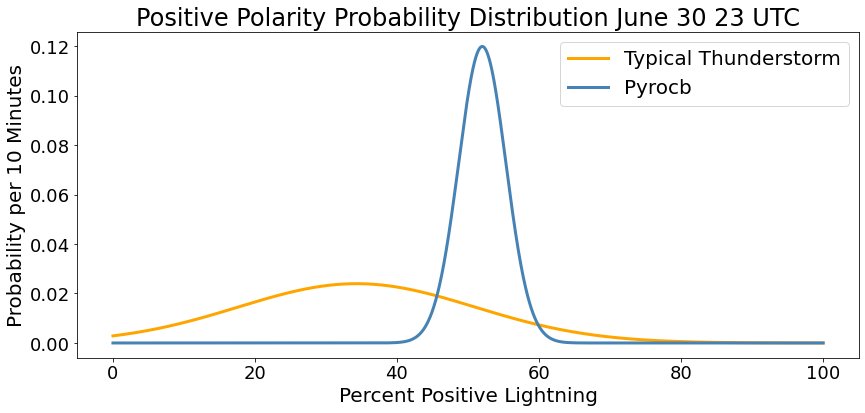

In [20]:
# creating probability distribution
# x axis is percent positive polarity 
# y axis is how likely that outcome is 
#could do a percent polarity over time# could graph percent polarity and time: if both regions are positive or negative at certain times 


fig = plt.figure(figsize=(14, 6))

# create bins  
percent_xValues = np.arange(0, 100+ 0.01, 0.01)
mean_clima = np.mean(flat_percent_pos_clima[12:18])
print(mean_clima)
std_clima = np.std(flat_percent_pos_clima[12:18])
print(std_clima)
mean_pyrocb = np.mean(flat_percent_pos_pyrocb[12:18])
print(mean_pyrocb)
std_pyrocb = np.std(flat_percent_pos_pyrocb[12:18])
print(std_clima)

# value of the normal distribution at xValues
normal_distr_fit_clima = ss.norm.pdf(percent_xValues, mean_clima, std_clima)
normal_distr_fit_pyrocb = ss.norm.pdf(percent_xValues, mean_pyrocb, std_pyrocb)

#Plotting the normal distribution over the data
plt.plot(percent_xValues,normal_distr_fit_clima, color="orange", label = "Typical Thunderstorm", linewidth = 3)
plt.plot(percent_xValues,normal_distr_fit_pyrocb, color="steelblue", label = "Pyrocb", linewidth = 3) 
plt.xticks(fontsize = 18)
plt.yticks(fontsize = 18)
# add axes and labels
plt.legend(fontsize = 20)
plt.title("Positive Polarity Probability Distribution June 30 23 UTC", fontsize = 24)
plt.xlabel("Percent Positive Lightning", fontsize = 20)
plt.ylabel("Probability per 10 Minutes", fontsize = 20)
plt.savefig("Probability distribution of positive lightning 23 UTC", dpi = 200)

# animated probability time series 

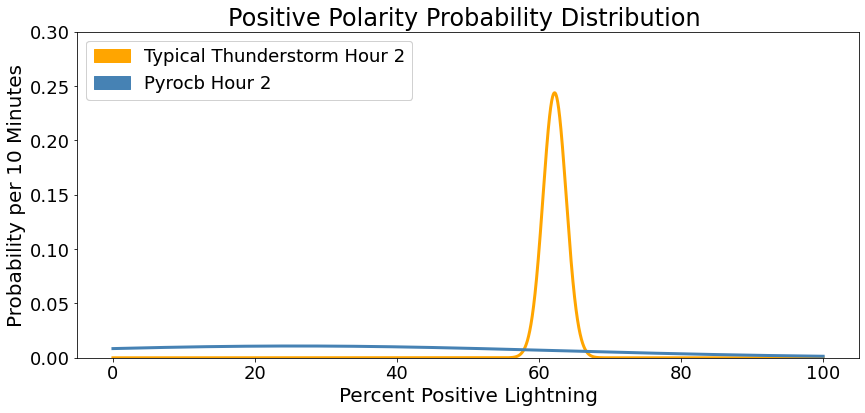

In [21]:
# 0 - 6: 21
# 6-12: 22
# 12-18: 23
# 18-24:0
# 24-30: 1
# 30 - 36: 2
# 36 - 42: 3
# 42- 48: 4
# 48 - 54:5

fig = plt.figure(figsize=(14, 6))
camera = Camera(fig)
ax = plt.axes() #xlim=(0, 1), ylim=(0, 1)

hours = [21, 0, 0, 0, 0, 0, 22, 0, 0, 0, 0, 0, 23, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0,
         2, 0, 0, 0, 0, 0, 3, 0, 0, 0, 0, 0, 4, 0, 0, 0, 0, 0, 5]
hours[12]
mean_clima = np.zeros(54)
std_clima = np.zeros(54)
mean_pyrocb = np.zeros(54)
std_pyrocb = np.zeros(54)#(len(hours))

for i in range(6,36,6):
# create bins  
    percent_xValues = np.arange(0, 100+ 0.01, 0.01)
    ax.set_ylim([0, 0.3])
   # print([i])
    mean_clima[i] = np.mean(flat_percent_pos_clima[i:i+6])
    #print(mean_clima[i])
    std_clima[i] = np.std(flat_percent_pos_clima[i:i+6])
    mean_pyrocb[i] = np.mean(flat_percent_pos_pyrocb[i:i+6])
    std_pyrocb[i] = np.std(flat_percent_pos_pyrocb[i:i+6])

    # value of the normal distribution at xValues
    normal_distr_fit_clima = ss.norm.pdf(percent_xValues, mean_clima[i], std_clima[i])
    normal_distr_fit_pyrocb = ss.norm.pdf(percent_xValues, mean_pyrocb[i], std_pyrocb[i])

    #Plotting the normal distribution over the data
    plt.plot(percent_xValues, normal_distr_fit_clima, color="orange", linewidth = 3) #, label = "Typical Thunderstorm",
    plt.plot(percent_xValues, normal_distr_fit_pyrocb, color="steelblue",  linewidth = 3) #label = "Pyrocb",
    plt.xticks(fontsize = 18)
    plt.yticks(fontsize = 18)
    # add axes and labels
    orange_patch = mpatches.Patch(color='orange', label='Typical Thunderstorm Hour {}'.format(hours[i]))
    blue_patch = mpatches.Patch(color='steelblue', label='Pyrocb Hour {}'.format(hours[i]))
    plt.legend(handles=[orange_patch, blue_patch], fontsize = 18)
    #plt.title("Positive Polarity Probability Distribution June 30 {} UTC".format(hours[i]), fontsize = 24)
   # plt.legend(['{}'.format(hours[i])], loc = "upper right")
    plt.title("Positive Polarity Probability Distribution ", fontsize = 24)

    plt.xlabel("Percent Positive Lightning", fontsize = 20)
    plt.ylabel("Probability per 10 Minutes", fontsize = 20)
    camera.snap()

animation = camera.animate(interval = 1000, repeat = True, repeat_delay = 500, blit=True)

animation.save("animation_probability_distribution.gif", dpi = 400) 
HTML(animation.to_html5_video()) 

### Plot current of strikes vs percent positive 

# Gridded Earth System Data

In [22]:
def add_sub_region_box(ax, subregion):
    """
    https://groups.google.com/forum/#!topic/scitools-iris/LxR0EbQolyE
    Note:
    ----
    order is important:
        lower-left, upper-left, upper-right, lower-right
        2 -- 3
        |    |
        1 -- 4
    """
    geom = geometry.box(minx=-122,maxx=-120,miny=51,maxy=52)
    ax.add_geometries([geom], ccrs.PlateCarree(), alpha=0.3)
    return ax

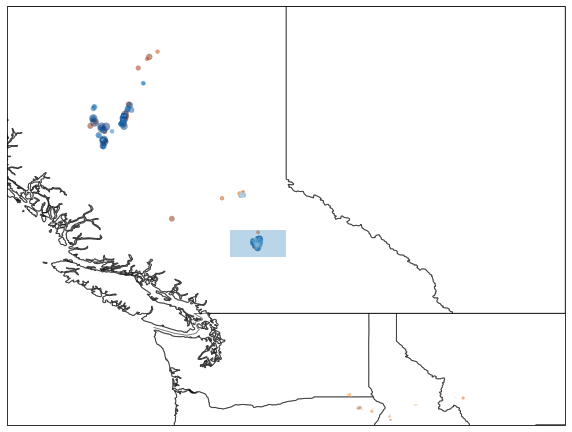

In [23]:
fig = plt.figure(figsize=(10,10))

ax = plt.axes(projection=ccrs.PlateCarree())
ax.add_feature(cartopy.feature.BORDERS, linestyle = '-', alpha = 0.5)
ax.add_feature(cartopy.feature.COASTLINE, linestyle = '-', alpha = 0.5)
ax.add_feature(cartopy.feature.STATES, linestyle = '-', alpha = 0.5, edgecolor="black")


# Make figure larger
plt.xlim([-130, -110])
plt.ylim([45, 60])


points_pos = (june30_july1_concat.loc[(june30_july1_concat.lon > -130) & (june30_july1_concat.lon < -100) & (june30_july1_concat.lat > 45) & (june30_july1_concat.lat < 65) & (june30_july1_concat["peak-current"] > 0) & (june30_july1_concat["hour"] == 23)])# & (june30_july1_concat["hour"] <=1)])
points_neg = (june30_july1_concat.loc[(june30_july1_concat.lon > -130) & (june30_july1_concat.lon < -100) & (june30_july1_concat.lat > 45) & (june30_july1_concat.lat < 65) & (june30_july1_concat["peak-current"] < 0) & (june30_july1_concat["hour"] >= 23)])# & (june30_july1_concat["hour"] <=1)])

#positive polarity
plt.scatter(x = points_pos["lon"], y = points_pos["lat"], c = np.log(points_pos["peak-current"]), cmap="Oranges", s = points_pos["peak-current"] * 0.5, edgecolors="none", marker = 'o', alpha=0.5)
#negative polarity 
plt.scatter(x = points_neg["lon"], y = points_neg["lat"], c = np.log(abs(points_neg["peak-current"])), cmap="Blues", s = abs(points_neg["peak-current"]) * 0.5, edgecolors="none", marker = 'o', alpha=0.5)

add_sub_region_box(ax, points_pos)

plt.savefig("pos_neg_map", dpi = 200)

plt.show()

## Make subplots for positive and negative 

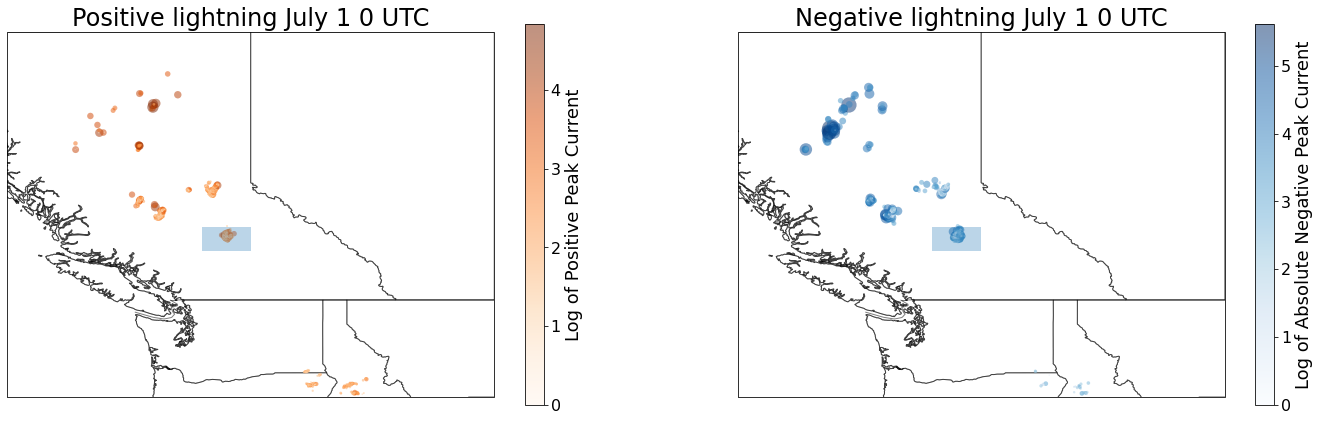

In [24]:
fig = plt.figure(figsize=(24,28))

# # Make figure larger
# plt.xlim([-140, -100])
# plt.ylim([45, 60])

#positive polarity
ax = plt.subplot(1,2,1 ,projection=ccrs.PlateCarree())
ax.set_extent([-130,-110,45,60])
#ax = plt.axes(projection=ccrs.PlateCarree())
ax.add_feature(cartopy.feature.BORDERS, linestyle = '-', alpha = 0.5)
ax.add_feature(cartopy.feature.STATES, linestyle = '-', alpha = 0.5)
ax.add_feature(cartopy.feature.COASTLINE, linestyle = '-', alpha = 0.5)
points_pos = (july1.loc[(july1.lon > -130) & (july1.lon < -100) & (july1.lat > 45) & (july1.lat < 65) & (july1["peak-current"] > 0) & (july1.hour == 0)])
plt.scatter(x = points_pos["lon"], y = points_pos["lat"], c = np.log(points_pos["peak-current"]), cmap="Oranges", s = points_pos["peak-current"], edgecolors="none", marker = 'o', alpha=0.5)
add_sub_region_box(ax, points_pos)

cbar1 = plt.colorbar(shrink = 0.25)
for t in cbar1.ax.get_yticklabels():
     t.set_fontsize(16)
cbar1.set_label(label = "Log of Positive Peak Current", fontsize = 18)
plt.title("Positive lightning July 1 0 UTC", fontsize = 24)

#negative polarity 
ax = plt.subplot(1,2,2 ,projection=ccrs.PlateCarree())
ax.set_extent([-130,-110,45,60])
#ax = plt.axes(projection=ccrs.PlateCarree()) 
ax.add_feature(cartopy.feature.BORDERS, linestyle = '-', alpha = 0.5)
ax.add_feature(cartopy.feature.STATES, linestyle = '-', alpha = 0.5)
ax.add_feature(cartopy.feature.COASTLINE, linestyle = '-', alpha = 0.5)
points_neg = (july1.loc[(july1.lon > -130) & (july1.lon < -100) & (july1.lat > 45) & (july1.lat < 65) & (july1["peak-current"] < 0) & (july1.hour == 0)])
plt.scatter(x = points_neg["lon"], y = points_neg["lat"], c = np.log(abs(points_neg["peak-current"])), cmap="Blues", s = abs(points_neg["peak-current"]), edgecolors="none", marker = 'o', alpha=0.5)

#plt.colorbar().set_label(label='a label',size=15,weight='bold')

cbar2 = plt.colorbar(shrink = 0.25)
for t in cbar2.ax.get_yticklabels():
     t.set_fontsize(16)
cbar2.set_label(label = "Log of Absolute Negative Peak Current", fontsize = 18)
plt.title("Negative lightning July 1 0 UTC", fontsize = 24)
add_sub_region_box(ax, points_neg)


plt.savefig("pos_neg_subplots_0utc", dpi = 200)

plt.show()


/home/elenadworak/anaconda3/envs/mynewenv/lib/python3.8/site-packages/cartopy/mpl/geoaxes.py:1546: UserWarning: You passed a edgecolor/edgecolors ('none') for an unfilled marker ('+').  Matplotlib is ignoring the edgecolor in favor of the facecolor.  This behavior may change in the future.
  result = matplotlib.axes.Axes.scatter(self, *args, **kwargs)


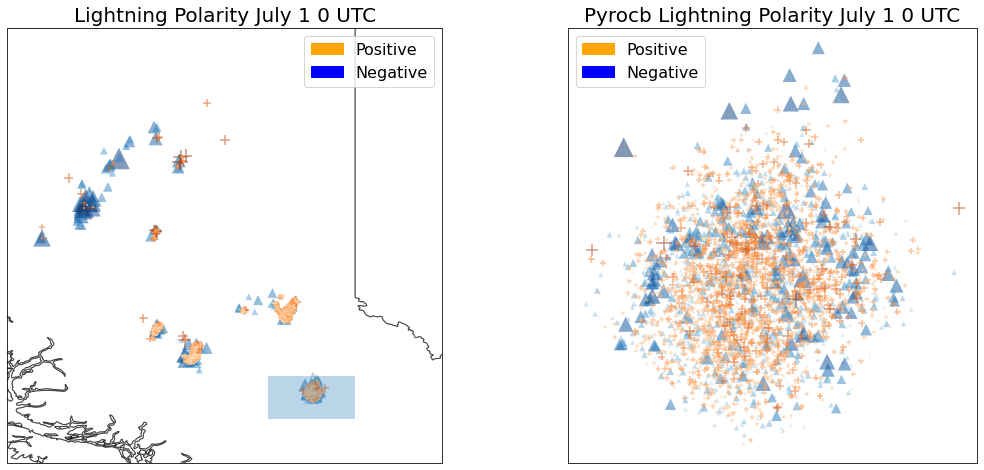

In [25]:
fig = plt.subplots(figsize=(18,8))

#entire region
ax = plt.subplot(1,2,1 ,projection=ccrs.PlateCarree())
ax.set_extent([-128,-118,50,60])
#ax = plt.axes(projection=ccrs.PlateCarree())
ax.add_feature(cartopy.feature.BORDERS, linestyle = '-', alpha = 0.5)
ax.add_feature(cartopy.feature.STATES, linestyle = '-', alpha = 0.5)
ax.add_feature(cartopy.feature.COASTLINE, linestyle = '-', alpha = 0.5)
points_neg_whole = (july1.loc[(july1.lon > -128) & (july1.lon < -118) & (july1.lat > 50) & (july1.lat < 60) & (july1["peak-current"] < 0) & (july1.hour == 0)])
points_pos_whole = (july1.loc[(july1.lon > -128) & (july1.lon < -118) & (july1.lat > 50) & (july1.lat < 60) & (july1["peak-current"] > 0) & (july1.hour == 0)])
#negative polarity 
plt.scatter(x = points_neg_whole["lon"], y = points_neg_whole["lat"], c = np.log(abs(points_neg_whole["peak-current"])), cmap="Blues", s = abs(points_neg_whole["peak-current"]) * 2, edgecolors="none", marker = "^", alpha=0.5)
#positive polarity
plt.scatter(x = points_pos_whole["lon"], y = points_pos_whole["lat"], c = np.log(points_pos_whole["peak-current"]), cmap="Oranges", s = points_pos_whole["peak-current"] * 2, edgecolors="none", marker = '+', alpha=0.5)
add_sub_region_box(ax, points_pos_whole)
orange_patch2 = mpatches.Patch(color='orange', label='Positive')
blue_patch2 = mpatches.Patch(color='blue', label='Negative')
plt.legend(handles=[orange_patch2, blue_patch2], fontsize = 16)

plt.title("Lightning Polarity July 1 0 UTC", fontsize = 20)

#pyrocb region  
ax = plt.subplot(1,2,2 ,projection=ccrs.PlateCarree())
#ax.set_extent([-122,-119,48,52])
#ax = plt.axes(projection=ccrs.PlateCarree()) 
ax.add_feature(cartopy.feature.BORDERS, linestyle = '-', alpha = 0.5)
ax.add_feature(cartopy.feature.STATES, linestyle = '-', alpha = 0.5)
ax.add_feature(cartopy.feature.COASTLINE, linestyle = '-', alpha = 0.5)
points_neg_pyrocb = (july1.loc[(july1.lon > -122) & (july1.lon < -119) & (july1.lat > 48) & (july1.lat < 52) & (july1["peak-current"] < 0) & (july1.hour == 0)])
points_pos_pyrocb = (july1.loc[(july1.lon > -122) & (july1.lon < -119) & (july1.lat > 48) & (july1.lat < 52) & (july1["peak-current"] > 0) & (july1.hour == 0)])
#negative polarity 
plt.scatter(x = points_neg_pyrocb["lon"], y = points_neg_pyrocb["lat"], c = np.log(abs(points_neg_pyrocb["peak-current"])), cmap="Blues", s = abs(points_neg_pyrocb["peak-current"]) * 5, edgecolors="none", marker = '^', alpha=0.5)
#positive polarity
plt.scatter(x = points_pos_pyrocb["lon"], y = points_pos_pyrocb["lat"], c = np.log(points_pos_pyrocb["peak-current"]), cmap="Oranges", s = points_pos_pyrocb["peak-current"] * 5, edgecolors="none", marker = '+', alpha=0.5)
orange_patch3 = mpatches.Patch(color='orange', label='Positive')
blue_patch3 = mpatches.Patch(color='blue', label='Negative')
plt.legend(handles=[orange_patch3, blue_patch3], fontsize = 16)
plt.title("Pyrocb Lightning Polarity July 1 0 UTC", fontsize = 20)
plt.savefig("whole_pyrocb_0utc_subplots", dpi = 600)
plt.show()




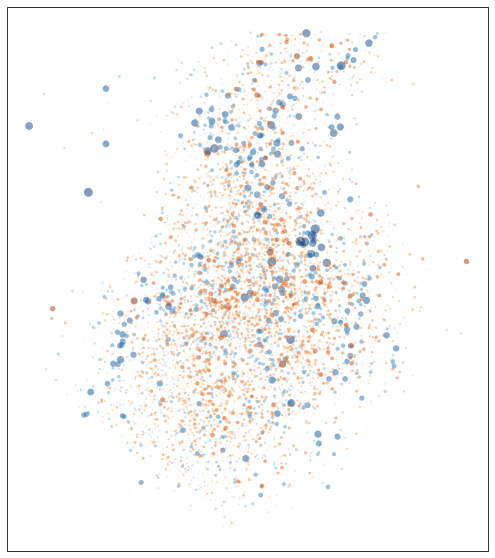

In [26]:
fig = plt.figure(figsize=(10,10))

ax = plt.axes(projection=ccrs.PlateCarree())
ax.add_feature(cartopy.feature.BORDERS, linestyle = '-', alpha = 0.5)
ax.add_feature(cartopy.feature.COASTLINE, linestyle = '-', alpha = 0.5)
ax.add_feature(cartopy.feature.STATES, linestyle = '-', alpha = 0.5, edgecolor="black")


# Make figure larger
# plt.xlim([-130, -110])
# plt.ylim([45, 60])

points_pos = (july1.loc[(july1.lon > -122) & (july1.lon < -119) & (july1.lat > 48) & (july1.lat < 52) & (july1["peak-current"] > 0) & (july1.hour >= 0) & (july1.hour <=3)])
points_neg = (july1.loc[(july1.lon > -122) & (july1.lon < -119) & (july1.lat > 48) & (july1.lat < 52) & (july1["peak-current"] < 0) & (july1.hour >= 0) & (july1.hour <=3)])

#negative polarity 
plt.scatter(x = points_neg["lon"], y = points_neg["lat"], c = np.log(abs(points_neg["peak-current"])), cmap="Blues", s = abs(points_neg["peak-current"]), edgecolors="none", marker = 'o', alpha=0.5)

#positive polarity
plt.scatter(x = points_pos["lon"], y = points_pos["lat"], c = np.log(points_pos["peak-current"]), cmap="Oranges", s = points_pos["peak-current"], edgecolors="none", marker = 'o', alpha=0.5)


plt.savefig("pos_neg_map", dpi = 200)

plt.show()

## Figure inspired by chrisholm paper ranking by KA 
- whole_darkblue: < -50 KA: filled dark blue circles 
- whole_medblue: -50 → -25 KA: unfilled medium blue circles
- whole_lightblue: -25 → 0 KA: light blue pluses 
- whole_lightorange:0 → 25 KA: light orange crosses 
- whole_darkorange: 25 → 50 KA: dark orange empty circles
- whole_red: 50 → 100 KA: filled red circles 
- whole_black: > 100 KA: filled black squares


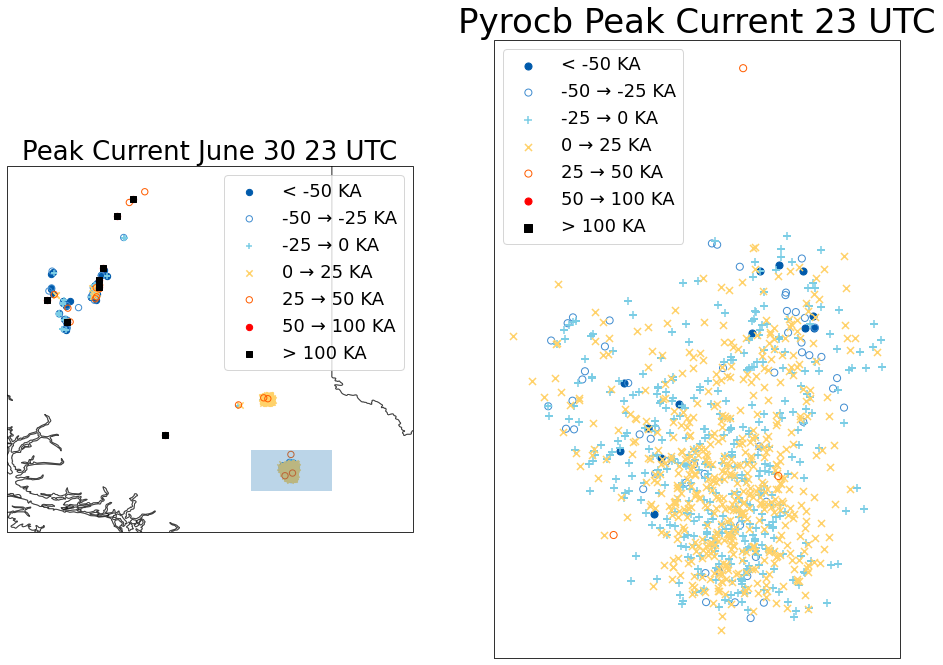

In [27]:
fig = plt.figure(figsize=(16,20))

#entire region
ax = plt.subplot(1,2,1 ,projection=ccrs.PlateCarree())
ax.set_extent([-128,-118,50,59])
#ax = plt.axes(projection=ccrs.PlateCarree())
ax.add_feature(cartopy.feature.BORDERS, linestyle = '-', alpha = 0.5)
ax.add_feature(cartopy.feature.STATES, linestyle = '-', alpha = 0.5)
ax.add_feature(cartopy.feature.COASTLINE, linestyle = '-', alpha = 0.5)

whole_darkblue = (june30_july1_concat.loc[(june30_july1_concat.lon > -128) & (june30_july1_concat.lon < -118) & (june30_july1_concat.lat > 50) & (june30_july1_concat.lat < 60) & (june30_july1_concat["peak-current"] <= -50) & (june30_july1_concat.hour == 23) ])
whole_medblue = (june30_july1_concat.loc[(june30_july1_concat.lon > -128) & (june30_july1_concat.lon < -118) & (june30_july1_concat.lat > 50) & (june30_july1_concat.lat < 60) & (june30_july1_concat["peak-current"] > -50 ) & (june30_july1_concat["peak-current"] <=-25 ) & (june30_july1_concat.hour == 23)])
whole_lightblue = (june30_july1_concat.loc[(june30_july1_concat.lon > -128) & (june30_july1_concat.lon < -118) & (june30_july1_concat.lat > 50) & (june30_july1_concat.lat < 60) & (june30_july1_concat["peak-current"] > -25 ) & (june30_july1_concat["peak-current"] <=0 ) & (june30_july1_concat.hour == 23)])
whole_lightorange = (june30_july1_concat.loc[(june30_july1_concat.lon > -128) & (june30_july1_concat.lon < -118) & (june30_july1_concat.lat > 50) & (june30_july1_concat.lat < 60) & (june30_july1_concat["peak-current"] > 0 ) & (june30_july1_concat["peak-current"] <=25 ) & (june30_july1_concat.hour == 23)])
whole_darkorange = (june30_july1_concat.loc[(june30_july1_concat.lon > -128) & (june30_july1_concat.lon < -118) & (june30_july1_concat.lat > 50) & (june30_july1_concat.lat < 60) & (june30_july1_concat["peak-current"] > 25 ) & (june30_july1_concat["peak-current"] <=50 ) & (june30_july1_concat.hour == 23)])
whole_red = (june30_july1_concat.loc[(june30_july1_concat.lon > -128) & (june30_july1_concat.lon < -118) & (june30_july1_concat.lat > 50) & (june30_july1_concat.lat < 60) & (june30_july1_concat["peak-current"] > 50 ) & (june30_july1_concat["peak-current"] <=100 ) & (june30_july1_concat.hour == 23)])
whole_black = (june30_july1_concat.loc[(june30_july1_concat.lon > -128) & (june30_july1_concat.lon < -118) & (june30_july1_concat.lat > 50) & (june30_july1_concat.lat < 60) & (june30_july1_concat["peak-current"] > 100 ) & (june30_july1_concat.hour == 23)])


plt.scatter(x = whole_darkblue["lon"], y = whole_darkblue["lat"], facecolors='#005AAB', edgecolors='#005AAB', marker = "o", s = 40,  alpha=1, label = '< -50 KA')
plt.scatter(x = whole_medblue["lon"], y = whole_medblue["lat"], facecolors='none', s = 40, edgecolors='#418DD0', marker = "o",  alpha=1, label='-50 → -25 KA')
plt.scatter(x = whole_lightblue["lon"], y = whole_lightblue["lat"], c = "#7BCDE5", marker = "+", s = 40,  alpha=1, label='-25 → 0 KA')
plt.scatter(x = whole_lightorange["lon"], y = whole_lightorange["lat"], c = "#FFD26A", marker = "x", s = 40,  alpha=1, label = "0 → 25 KA")
plt.scatter(x = whole_darkorange["lon"], y = whole_darkorange["lat"], facecolors = "none", edgecolors = '#FF5D00', marker = "o", s = 40,  alpha=1, label ="25 → 50 KA" )
plt.scatter(x = whole_red["lon"], y = whole_red["lat"], facecolors = "r", edgecolors = 'r', marker = "o", s = 40,  alpha=1, label = "50 → 100 KA")
plt.scatter(x = whole_red["lon"], y = whole_red["lat"], c = "black", marker = "s", s = 30,  alpha=1, label = "> 100 KA")

plt.legend(fontsize = 18)
add_sub_region_box(ax, points_pos_whole)

plt.title("Peak Current June 30 23 UTC", fontsize = 26)


#pyrocb region  
ax = plt.subplot(1,2,2 ,projection=ccrs.PlateCarree())

ax.add_feature(cartopy.feature.BORDERS, linestyle = '-', alpha = 0.5)
ax.add_feature(cartopy.feature.STATES, linestyle = '-', alpha = 0.5)
ax.add_feature(cartopy.feature.COASTLINE, linestyle = '-', alpha = 0.5)

pyrocb_darkblue = (june30_july1_concat.loc[(june30_july1_concat.lon > -122) & (june30_july1_concat.lon < -119) & (june30_july1_concat.lat > 48) & (june30_july1_concat.lat < 52) & (june30_july1_concat["peak-current"] <= -50) & (june30_july1_concat.hour == 23)])
pyrocb_medblue = (june30_july1_concat.loc[(june30_july1_concat.lon > -122) & (june30_july1_concat.lon < -119) & (june30_july1_concat.lat > 48) & (june30_july1_concat.lat < 52) & (june30_july1_concat["peak-current"] > -50 ) & (june30_july1_concat["peak-current"] <=-25 ) & (june30_july1_concat.hour == 23)])
pyrocb_lightblue = (june30_july1_concat.loc[(june30_july1_concat.lon > -122) & (june30_july1_concat.lon < -119) & (june30_july1_concat.lat > 48) & (june30_july1_concat.lat < 52) & (june30_july1_concat["peak-current"] > -25 ) & (june30_july1_concat["peak-current"] <=0 ) & (june30_july1_concat.hour == 23)])
pyrocb_lightorange = (june30_july1_concat.loc[(june30_july1_concat.lon > -122) & (june30_july1_concat.lon < -119) & (june30_july1_concat.lat > 48) & (june30_july1_concat.lat < 52) & (june30_july1_concat["peak-current"] > 0 ) & (june30_july1_concat["peak-current"] <=25 ) & (june30_july1_concat.hour == 23)])
pyrocb_darkorange = (june30_july1_concat.loc[(june30_july1_concat.lon > -122) & (june30_july1_concat.lon < -119) & (june30_july1_concat.lat > 48) & (june30_july1_concat.lat < 52) & (june30_july1_concat["peak-current"] > 25 ) & (june30_july1_concat["peak-current"] <=50 ) & (june30_july1_concat.hour == 23)])
pyrocb_red = (june30_july1_concat.loc[(june30_july1_concat.lon > -122) & (june30_july1_concat.lon < -119) & (june30_july1_concat.lat > 48) & (june30_july1_concat.lat < 52) & (june30_july1_concat["peak-current"] > 50 ) & (june30_july1_concat["peak-current"] <=100 ) & (june30_july1_concat.hour == 23)])
pyrocb_black = (june30_july1_concat.loc[(june30_july1_concat.lon > -122) & (june30_july1_concat.lon < -119) & (june30_july1_concat.lat > 48) & (june30_july1_concat.lat < 52) & (june30_july1_concat["peak-current"] > 100 ) & (june30_july1_concat.hour == 23)])


plt.scatter(x = pyrocb_darkblue["lon"], y = pyrocb_darkblue["lat"], facecolors='#005AAB', edgecolors='#005AAB', marker = "o", s = 50, alpha=1, label = '< -50 KA')
plt.scatter(x = pyrocb_medblue["lon"], y = pyrocb_medblue["lat"], facecolors='none', edgecolors='#418DD0', marker = "o", s = 50, alpha=1, label='-50 → -25 KA')
plt.scatter(x = pyrocb_lightblue["lon"], y = pyrocb_lightblue["lat"], c = "#7BCDE5", marker = "+", s = 50, alpha=1, label='-25 → 0 KA')
plt.scatter(x = pyrocb_lightorange["lon"], y = pyrocb_lightorange["lat"], c = "#FFD26A", marker = "x", s = 50, alpha=1, label = "0 → 25 KA")
plt.scatter(x = pyrocb_darkorange["lon"], y = pyrocb_darkorange["lat"], facecolors = "none", edgecolors = '#FF5D00', marker = "o", s = 50, alpha=1, label ="25 → 50 KA" )
plt.scatter(x = pyrocb_red["lon"], y = pyrocb_red["lat"], facecolors = "r", edgecolors = 'r', marker = "o", s = 50, alpha=1, label = "50 → 100 KA")
plt.scatter(x = pyrocb_red["lon"], y = pyrocb_red["lat"], c = "black", marker = "s", s = 50, alpha=1, label = "> 100 KA")

plt.legend(loc = "upper left", fontsize = 18)

plt.title("Pyrocb Peak Current 23 UTC", fontsize = 34)
plt.savefig("lightning_strength_and_polarity_23utc_subplots", dpi = 200)
plt.show()




## histogram 

### combined histogram

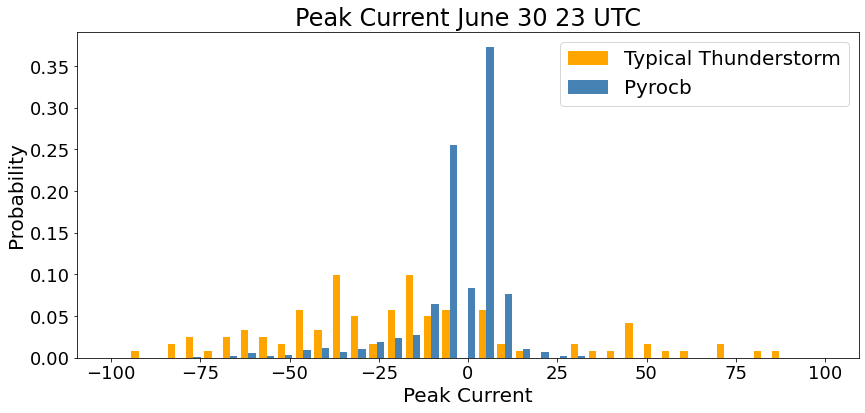

In [28]:
fig = plt.figure(figsize=(14,6))
#fig, ax = plt.subplots(figsize=(10,8))

data_pyrocb = (june30.loc[(june30.lon > -122) & (june30.lon < -119) & (june30.lat > 48) & (june30.lat < 52) & (june30.hour == 23)])
array_pyrocb = data_pyrocb["peak-current"]
#print(array_pyrocb)
weights2 = np.ones_like(array_pyrocb) / len(array_pyrocb)

data_clima = (june30.loc[(june30.lon > -130) & (june30.lon < -110) & (june30.lat >= 54) & (june30.lat < 60) & (june30.hour == 23)])
array_clima = data_clima["peak-current"]
weights1 = np.ones_like(array_clima) / len(array_clima)


#foo = np.random.normal(loc=1, size=100) # a normal distribution
#bar = np.random.normal(loc=-1, size=10000)

colors = ["orange", "steelblue"]

bins = np.linspace(-100, 100, 40)
#bins=[-100, -50, -25, 0, 25, 50, 100, 200]

plt.hist([array_clima, array_pyrocb], bins, alpha = 1, histtype='bar', weights = [weights1, weights2], color=colors, label = ["Typical Thunderstorm", "Pyrocb"]) 
#ax.set_xlim(-10,10)
#plt.set_ylabel("Probability")

#plt.hist(data_clima, bins, alpha = 0.5, facecolor='orange', histtype='stepfilled', weights = weights1, label = "Clima")
#plt.hist(data_pyrocb, bins, alpha = 0.5, facecolor='steelblue', histtype='stepfilled', weights = weights2, label = "Pyrocb")
#plt.hist([data_clima, data_pyrocb], bins, alpha = 0.5, histtype='bar', label = ["Clima", "Pyrocb"])

#plt.tight_layout()
plt.title("Peak Current June 30 23 UTC", fontsize = 24)
plt.xlabel("Peak Current", fontsize = 20)
plt.ylabel("Probability", fontsize = 20)
plt.legend(loc = "upper right", fontsize = 20)
plt.xticks(fontsize = 18)
plt.yticks(fontsize = 18)
plt.savefig("combined_polarity_histogram", dpi = 200)
plt.show()


## absolute value histogram

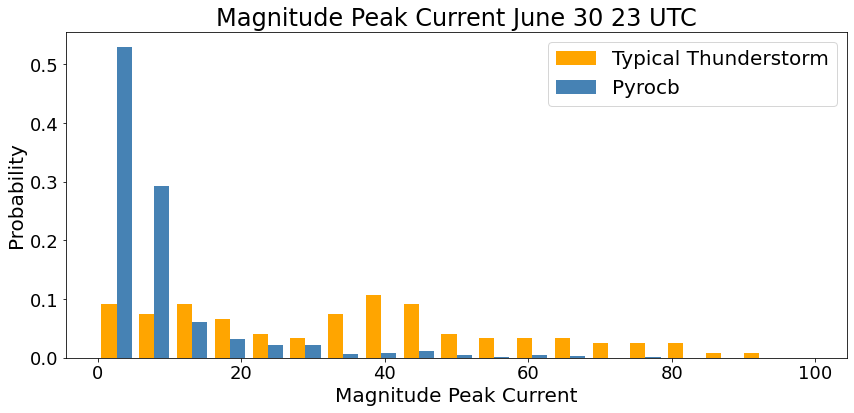

In [29]:
fig = plt.figure(figsize=(14,6))
#fig, ax = plt.subplots(figsize=(10,8))

data_pyrocb = (june30.loc[(june30.lon > -122) & (june30.lon < -119) & (june30.lat > 48) & (june30.lat < 52) & (june30.hour == 23)])
array_pyrocb = np.abs(data_pyrocb["peak-current"])
#print(array_pyrocb)
weights2 = np.ones_like(array_pyrocb) / len(array_pyrocb)

data_clima = (june30.loc[(june30.lon > -130) & (june30.lon < -110) & (june30.lat >= 54) & (june30.lat < 60) & (june30.hour == 23)])
array_clima = np.abs(data_clima["peak-current"])
weights1 = np.ones_like(array_clima) / len(array_clima)


#foo = np.random.normal(loc=1, size=100) # a normal distribution
#bar = np.random.normal(loc=-1, size=10000)

colors = ["orange", "steelblue"]

bins = np.linspace(0, 100, 20)
#bins=[-100, -50, -25, 0, 25, 50, 100, 200]

plt.hist([array_clima, array_pyrocb], bins, alpha = 1, histtype='bar', weights = [weights1, weights2], color=colors, label = ["Typical Thunderstorm", "Pyrocb"]) 
#ax.set_xlim(-10,10)
#plt.set_ylabel("Probability")

#plt.hist(data_clima, bins, alpha = 0.5, facecolor='orange', histtype='stepfilled', weights = weights1, label = "Clima")
#plt.hist(data_pyrocb, bins, alpha = 0.5, facecolor='steelblue', histtype='stepfilled', weights = weights2, label = "Pyrocb")
#plt.hist([data_clima, data_pyrocb], bins, alpha = 0.5, histtype='bar', label = ["Clima", "Pyrocb"])

#plt.tight_layout()
plt.title("Magnitude Peak Current June 30 23 UTC", fontsize = 24)
plt.xlabel("Magnitude Peak Current", fontsize = 20)
plt.ylabel("Probability", fontsize = 20)
plt.legend(loc = "upper right", fontsize = 20)
plt.xticks(fontsize = 18)
plt.yticks(fontsize = 18)
plt.savefig("combined_magnitude_histogram", dpi = 200)
plt.show()




# entire event 
- pyrocb: lon >= -122 & <= -119 & lat >= 50 & <= 53
- clima: lon >= -130 & <= -120 & lat >= 55 & <= 65

In [30]:
days = [29, 30, 1]
hours = range(0, 24, 1)
mins = range(0, 60, 10)

num_strikes_pyrocb2 = np.zeros((len(days), len(hours), len(mins)))
mean_current_pyrocb2 = np.zeros((len(days), len(hours), len(mins)))
mean_pos_current_pyrocb2 = np.zeros((len(days), len(hours), len(mins)))
mean_neg_current_pyrocb2 = np.zeros((len(days), len(hours), len(mins)))
percent_pos_current_pyrocb2 = np.zeros((len(days), len(hours), len(mins)))
num_pos_current_pyrocb2 =  np.zeros((len(days), len(hours), len(mins)))
num_neg_current_pyrocb2 =  np.zeros((len(days), len(hours), len(mins)))
log_num_strikes_pyrocb2 = np.zeros((len(days), len(hours), len(mins)))
log_num_pos_current_pyrocb2 = np.zeros((len(days), len(hours), len(mins)))
log_num_neg_current_pyrocb2 = np.zeros((len(days), len(hours), len(mins)))

num_strikes_clima2 = np.zeros((len(days), len(hours), len(mins)))
mean_current_clima2 = np.zeros((len(days), len(hours), len(mins)))
mean_pos_current_clima2 = np.zeros((len(days), len(hours), len(mins)))
mean_neg_current_clima2 = np.zeros((len(days), len(hours), len(mins)))
percent_pos_current_clima2 = np.zeros((len(days), len(hours),len(mins)))
num_pos_current_clima2 = np.zeros((len(days), len(hours), len(mins)))
num_neg_current_clima2 = np.zeros((len(days), len(hours), len(mins)))
log_num_strikes_clima2 = np.zeros((len(days), len(hours), len(mins)))
log_num_pos_current_clima2 = np.zeros((len(days), len(hours), len(mins)))
log_num_neg_current_clima2 = np.zeros((len(days), len(hours), len(mins)))

num_strikes_smoke = np.zeros((len(days), len(hours), len(mins)))
mean_current_smoke = np.zeros((len(days), len(hours), len(mins)))
mean_pos_current_smoke = np.zeros((len(days), len(hours), len(mins)))
mean_neg_current_smoke = np.zeros((len(days), len(hours), len(mins)))
percent_pos_current_smoke = np.zeros((len(days), len(hours),len(mins)))
num_pos_current_smoke = np.zeros((len(days), len(hours), len(mins)))
num_neg_current_smoke = np.zeros((len(days), len(hours), len(mins)))


# ten minute time interval 
# use the concat data set instead 
def strikes_current_whole(df):
    for d in range(len(days)): 
        for i in range(len(hours)): 
            for j in range(len(mins)): 
                base = 5
                time = df[(df["day"] == days[d]) & (df["hour"] == hours[i]) & (df["minute"] >= mins[j]) & (df["minute"] <= mins[j] + 9) & (df["peak-current"] != 0)]
            ### doing for pyrocb ### 
        ### pyrocb is log base 5
                strikes_pyrocb2 = (time.loc[(time["lon"] >= -122) & (time["lon"] <= -119) & (time["lat"] >= 50) & (time["lat"] <= 53)])
                if len(strikes_pyrocb2) >= 1: 
                    num_strikes_pyrocb2[d,i,j] = len(strikes_pyrocb2)
                    log_num_strikes_pyrocb2[d,i,j] = np.log10(abs(num_strikes_pyrocb2[d,i,j])) / np.log10(base)

                    mean_current_pyrocb2[d,i,j] = (abs(strikes_pyrocb2["peak-current"])).mean()

                    #positive pyrocb                
                    pos_current_pyrocb2 = strikes_pyrocb2.loc[(strikes_pyrocb2["peak-current"] > 0)]
                    num_pos_current_pyrocb2[d,i,j]= len(pos_current_pyrocb2)
                    log_num_pos_current_pyrocb2[d,i,j] = np.log10(abs(num_pos_current_pyrocb2[d,i,j]))/ np.log10(base)
                    mean_pos_current_pyrocb2[d,i,j] = pos_current_pyrocb2["peak-current"].mean()

                    #negative pyrocb
                    neg_current_pyrocb2 = strikes_pyrocb2.loc[(strikes_pyrocb2["peak-current"] < 0)]
                    num_neg_current_pyrocb2[d,i,j] = len(neg_current_pyrocb2)
                    log_num_neg_current_pyrocb2[d,i,j] = np.log10(abs(num_neg_current_pyrocb2[d,i,j]))/ np.log10(base)

                    mean_neg_current_pyrocb2[d,i,j] = neg_current_pyrocb2["peak-current"].mean()

                    if len(strikes_pyrocb2)> 1: 
                        percent_pos_current_pyrocb2[d,i,j] = (len(pos_current_pyrocb2["peak-current"]) / len(strikes_pyrocb2)) * 100

            ### doing for climatology
            
        ### climatology is log base 5
                strikes_clima2 = (time.loc[(time["lon"] > -130) & (time["lon"] < -120) & (time["lat"] > 55) & (time["lat"] < 65)])
                if len(strikes_clima2) >= 1: 
                    num_strikes_clima2[d,i,j] = len(strikes_clima2)
                    log_num_strikes_clima2[d,i,j] = np.log10(abs(num_strikes_clima2[d,i,j]))/ np.log10(base)

                    #positive clima 
                    mean_current_clima2[d,i,j] = (abs(strikes_clima2["peak-current"])).mean()
                    pos_current_clima2 = strikes_clima2.loc[(strikes_clima2["peak-current"] > 0)]
                    num_pos_current_clima2[d,i,j] = len(pos_current_clima2)
                    log_num_pos_current_clima2[d,i,j] = np.log10(abs(num_pos_current_clima2[d,i,j]))/ np.log10(base)

                    mean_pos_current_clima2[d,i,j] = pos_current_clima2["peak-current"].mean()

                    #negative clima
                    neg_current_clima2 = strikes_clima2.loc[(strikes_clima2["peak-current"] < 0)]
                    num_neg_current_clima2[d,i,j] = len(neg_current_clima2)
                    log_num_neg_current_clima2[d,i,j] = np.log10(abs(num_neg_current_clima2[d,i,j]))/ np.log10(base)

                    mean_neg_current_clima2[d,i,j] = neg_current_clima2["peak-current"].mean()

                    #strikes_greater_30_clima1 = strikes_clima1.loc[(strikes_clima1["peak-current"] > 30)]
                    if len(strikes_clima2) > 1: 
                        percent_pos_current_clima2[d,i,j] = (len(pos_current_clima2["peak-current"]) / len(strikes_clima2)) * 100

   
                strikes_smoke = (time.loc[(time["lon"] >= -120) & (time["lon"] <= -112) & (time["lat"] >= 57.5) & (time["lat"] <= 62)])
                if len(strikes_smoke) >= 1: 
                    num_strikes_smoke[d,i,j] = len(strikes_smoke)

                    #positive clima 
                    mean_current_smoke[d,i,j] = (abs(strikes_smoke["peak-current"])).mean()
                    pos_current_smoke = strikes_smoke.loc[(strikes_smoke["peak-current"] > 0)]
                    num_pos_current_smoke[d,i,j] = len(pos_current_smoke)

                    mean_pos_current_smoke[d,i,j] = pos_current_smoke["peak-current"].mean()

                    #negative clima
                    neg_current_smoke = strikes_smoke.loc[(strikes_smoke["peak-current"] < 0)]
                    num_neg_current_smoke[d,i,j] = len(neg_current_smoke)

                    mean_neg_current_smoke[d,i,j] = neg_current_smoke["peak-current"].mean()

                    if len(strikes_smoke) > 1: 
                        percent_pos_current_smoke[d,i,j] = (len(pos_current_smoke["peak-current"]) / len(strikes_smoke)) * 100




    return(num_strikes_pyrocb2, mean_current_pyrocb2, mean_pos_current_pyrocb2, mean_neg_current_pyrocb2, 
           percent_pos_current_pyrocb2, num_strikes_clima2, mean_current_clima2, mean_pos_current_clima2, 
           mean_neg_current_clima2, percent_pos_current_clima2, num_pos_current_pyrocb2, num_neg_current_pyrocb2, 
           num_pos_current_clima2, num_neg_current_clima2, 
           log_num_strikes_pyrocb2,log_num_pos_current_pyrocb2, log_num_neg_current_pyrocb2,
           log_num_strikes_clima2, log_num_pos_current_clima2, log_num_neg_current_clima2, 
         
           num_strikes_smoke, mean_current_smoke, num_pos_current_smoke, mean_pos_current_smoke, 
           num_neg_current_smoke, percent_pos_current_smoke)


- 0: num_strikes_pyrocb2
- 1: mean_current_pyrocb2
- 2: mean_pos_current_pyrocb2
- 3: mean_neg_current_pyrocb2, 
- 4: percent_pos_current_pyrocb2,
- 5: num_strikes_clima2, 
- 6: mean_current_clima2, 
- 7: mean_pos_current_clima2, 
- 8: mean_neg_current_clima2, 
- 9: percent_pos_current_clima2, 
- 10: num_pos_current_pyrocb2, 
- 11: num_neg_current_pyrocb2, 
- 12: num_pos_current_clima2, 
- 13: num_neg_current_clima2, 
- 14: log_num_strikes_pyrocb2,
- 15: log_num_pos_current_pyrocb2, 
- 16: log_num_neg_current_pyrocb2,
- 17: log_num_strikes_clima2, 
- 18: log_num_pos_current_clima2, 
- 19: log_num_neg_current_clima2
- 20: num_strikes_smoke
- 21: mean_current_smoke
- 22: num_pos_current_smoke
- 23: mean_pos_current_smoke
- 24: num_neg_current_smoke
- 25: percent_pos_current_smoke

## time series plot 
- X axis time: by day or hour 
- Y axis: total number of lightning strikes, data point per 10 minute interval 


## number of strikes and polarity june 29 - july 1

/tmp/ipykernel_326329/3014120694.py:84: RuntimeWarning: divide by zero encountered in log10
  log_num_pos_current_clima2[d,i,j] = np.log10(abs(num_pos_current_clima2[d,i,j]))/ np.log10(base)
/tmp/ipykernel_326329/3014120694.py:91: RuntimeWarning: divide by zero encountered in log10
  log_num_neg_current_clima2[d,i,j] = np.log10(abs(num_neg_current_clima2[d,i,j]))/ np.log10(base)
/tmp/ipykernel_326329/3014120694.py:59: RuntimeWarning: divide by zero encountered in log10
  log_num_pos_current_pyrocb2[d,i,j] = np.log10(abs(num_pos_current_pyrocb2[d,i,j]))/ np.log10(base)
/tmp/ipykernel_326329/3014120694.py:65: RuntimeWarning: divide by zero encountered in log10
  log_num_neg_current_pyrocb2[d,i,j] = np.log10(abs(num_neg_current_pyrocb2[d,i,j]))/ np.log10(base)


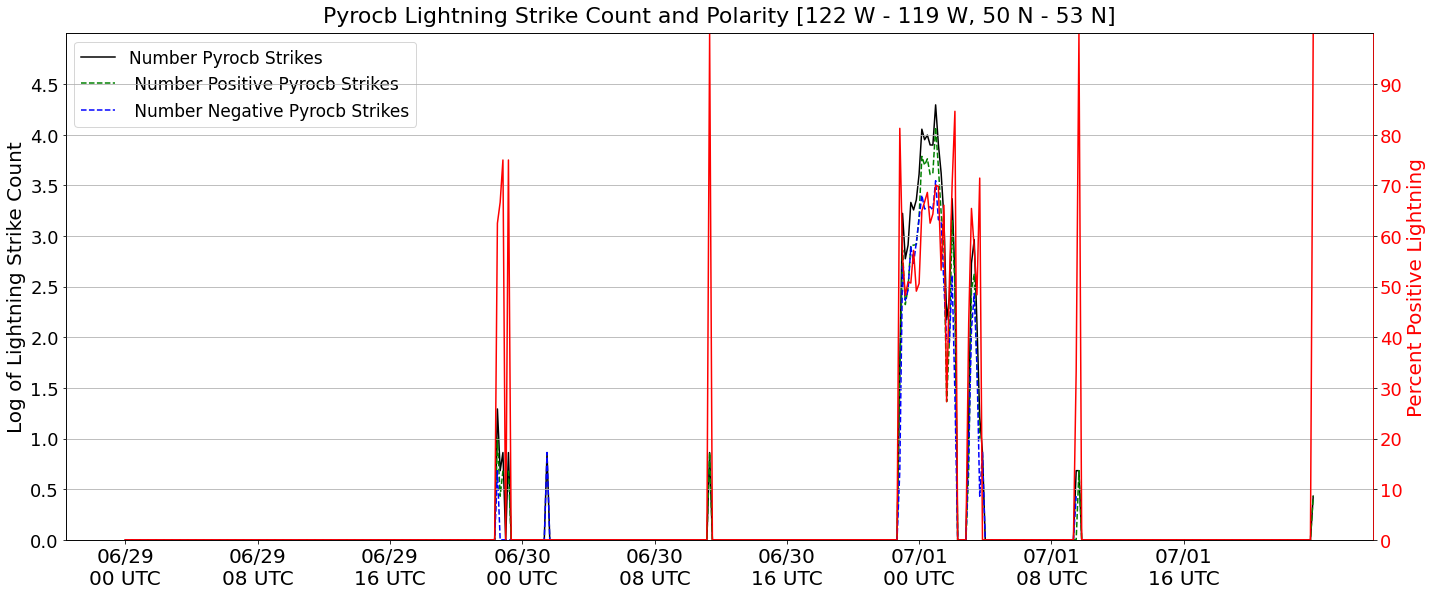

In [31]:
# total pyrocb strikes
#strikes_current_whole(whole_concat)[0]

# positive pyrocb strikes
#strikes_current_whole(whole_concat)[10]

# negative pyrocb strikes
#strikes_current_whole(whole_concat)[11]
from textwrap import wrap

a = strikes_current_whole(whole_concat)[14]
b = [item for sublist in a for item in sublist]
flat_num_strikes_pyrocb_whole = [item for sublist in b for item in sublist]

c = strikes_current_whole(whole_concat)[15]
d = [item for sublist in c for item in sublist]
flat_num_positive_pyrocb_whole = [item for sublist in d for item in sublist]

e = strikes_current_whole(whole_concat)[16]
f = [item for sublist in e for item in sublist]
flat_num_negative_pyrocb_whole = [item for sublist in f for item in sublist]

g = strikes_current_whole(whole_concat)[4]
h = [item for sublist in g for item in sublist]
flat_percent_pos_whole = [item for sublist in h for item in sublist]

fig,ax = plt.subplots(figsize=(20,8))

xValues = np.arange(0, 432, 1)
xticks = np.arange(0, 432, 48)
yticks = np.arange(0, 5, 0.5)
# plt.plot(time (x axis), number of lightning strikes (y axis) , color and line style, label = "label")

ax.plot(xValues, flat_num_strikes_pyrocb_whole, "k-", label = "Number Pyrocb Strikes")
ax.plot(xValues, flat_num_positive_pyrocb_whole, "g--", label = " Number Positive Pyrocb Strikes")
ax.plot(xValues, flat_num_negative_pyrocb_whole, "b--", label = " Number Negative Pyrocb Strikes")

ax.set_ylim((0,5))
#ax.set_xlabel("Date and Time", fontsize = 20)
ax.set_ylabel("Log of Lightning Strike Count", fontsize = 20)
ax.legend(loc = "upper left", fontsize = 17)
ax.set_xticks(xticks)
ax.set_yticks(yticks)
labels = ["06/29 00 UTC", "06/29 08 UTC", "06/29 16 UTC", "06/30 00 UTC", 
           "06/30 08 UTC", "06/30 16 UTC", "07/01 00 UTC", "07/01 08 UTC", "07/01 16 UTC"]
labels = ['\n'.join(wrap(l, 6)) for l in labels]
ax.set_xticklabels(labels, fontsize = 20)
ax.set_yticklabels(yticks, fontsize = 18)
#plt.grid()


# twin object for two different y-axis on the sample plot
yticks2 = np.arange(0, 100, 10)
ax2=ax.twinx()
# make a plot with different y-axis using second axis object
ax2.plot(xValues, flat_percent_pos_whole, color="red")
ax2.set_ylabel("Percent Positive Lightning", color="red",fontsize=20)
ax2.set_yticks(yticks2)
ax2.set_yticklabels(yticks2, fontsize = 18,  color="red")
ax2.set_ylim((0,100))
ax2.spines['right'].set_color('red')


plt.grid()
plt.tight_layout()
plt.title("Pyrocb Lightning Strike Count and Polarity [122 W - 119 W, 50 N - 53 N]", y=1.01, fontsize = 22) 
plt.savefig("count_polarity_long_timeseries.png", bbox_inches = "tight", dpi = 500)

## 06/29 18:00 - 07/01 12:00

/tmp/ipykernel_326329/3014120694.py:84: RuntimeWarning: divide by zero encountered in log10
  log_num_pos_current_clima2[d,i,j] = np.log10(abs(num_pos_current_clima2[d,i,j]))/ np.log10(base)
/tmp/ipykernel_326329/3014120694.py:91: RuntimeWarning: divide by zero encountered in log10
  log_num_neg_current_clima2[d,i,j] = np.log10(abs(num_neg_current_clima2[d,i,j]))/ np.log10(base)
/tmp/ipykernel_326329/3014120694.py:59: RuntimeWarning: divide by zero encountered in log10
  log_num_pos_current_pyrocb2[d,i,j] = np.log10(abs(num_pos_current_pyrocb2[d,i,j]))/ np.log10(base)
/tmp/ipykernel_326329/3014120694.py:65: RuntimeWarning: divide by zero encountered in log10
  log_num_neg_current_pyrocb2[d,i,j] = np.log10(abs(num_neg_current_pyrocb2[d,i,j]))/ np.log10(base)


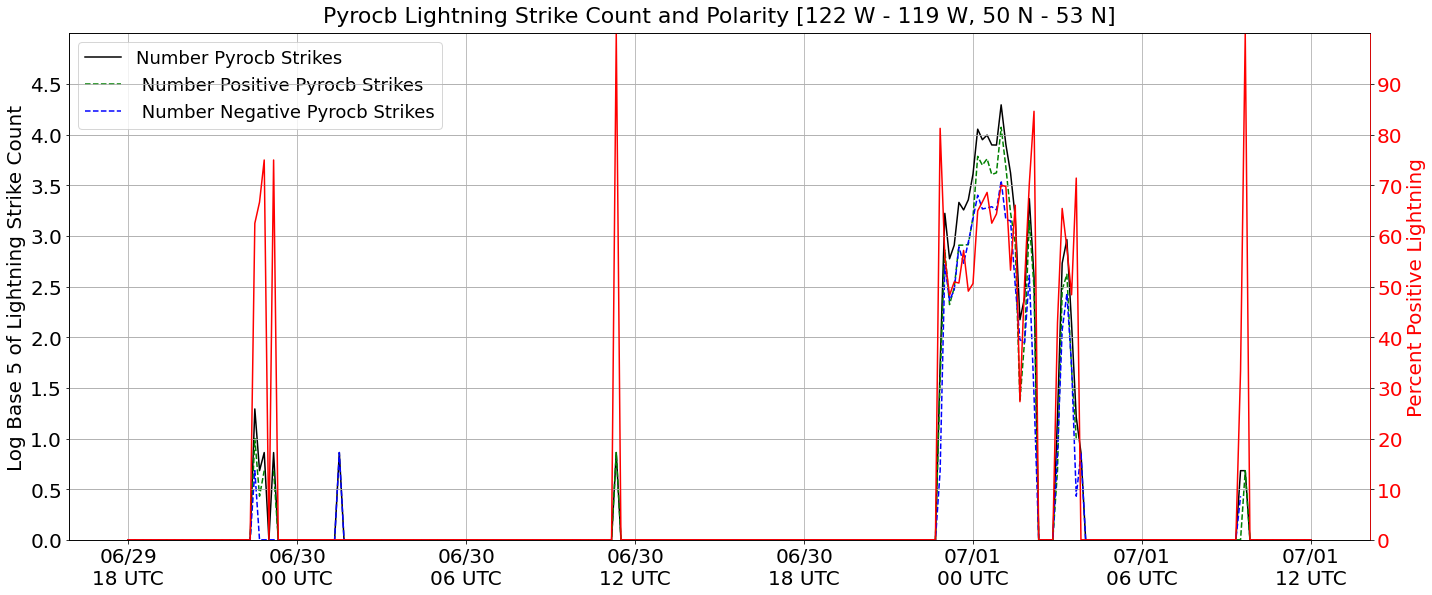

In [32]:
##### total pyrocb strikes
#strikes_current_whole(whole_concat)[0]

# positive pyrocb strikes
#strikes_current_whole(whole_concat)[10]

# negative pyrocb strikes
#strikes_current_whole(whole_concat)[11]
from textwrap import wrap

a = strikes_current_whole(whole_concat)[14]
b = [item for sublist in a for item in sublist]
flat_num_strikes_pyrocb_whole = [item for sublist in b for item in sublist]

c = strikes_current_whole(whole_concat)[15]
d = [item for sublist in c for item in sublist]
flat_num_positive_pyrocb_whole = [item for sublist in d for item in sublist]

e = strikes_current_whole(whole_concat)[16]
f = [item for sublist in e for item in sublist]
flat_num_negative_pyrocb_whole = [item for sublist in f for item in sublist]

g = strikes_current_whole(whole_concat)[4]
h = [item for sublist in g for item in sublist]
flat_percent_pos_whole = [item for sublist in h for item in sublist]

fig,ax = plt.subplots(figsize=(20,8))

xValues = np.arange(0, 253, 1)
xticks = np.arange(0, 253, 36)
yticks = np.arange(0, 5, 0.5)
# plt.plot(time (x axis), number of lightning strikes (y axis) , color and line style, label = "label")

# 06/29 18:00 - 07/01 12:00 
#[108 : 360]
ax.plot(xValues, flat_num_strikes_pyrocb_whole[108:361], "k-", label = "Number Pyrocb Strikes")
ax.plot(xValues, flat_num_positive_pyrocb_whole[108: 361], "g--", label = " Number Positive Pyrocb Strikes")
ax.plot(xValues, flat_num_negative_pyrocb_whole[108: 361], "b--", label = " Number Negative Pyrocb Strikes")

ax.set_ylim((0,5))
#ax.set_xlabel("Date and Time", fontsize = 20)
ax.set_ylabel("Log Base 5 of Lightning Strike Count", fontsize = 20)
ax.legend(loc = "upper left", fontsize = 18)
ax.set_xticks(xticks)
ax.set_yticks(yticks)
labels = ["06/29 18 UTC", "06/30 00 UTC", "06/30 06 UTC", "06/30 12 UTC", "06/30 18 UTC",  
          "07/01 00 UTC", "07/01 06 UTC", "07/01 12 UTC"]
labels = ['\n'.join(wrap(l, 6)) for l in labels]
ax.set_xticklabels(labels, fontsize = 20)
ax.set_yticklabels(yticks, fontsize = 20)
plt.grid()


# twin object for two different y-axis on the sample plot
yticks2 = np.arange(0, 100, 10)
ax2=ax.twinx()
# make a plot with different y-axis using second axis object
ax2.plot(xValues, flat_percent_pos_whole[108:361], color="red")
ax2.set_ylabel("Percent Positive Lightning", color="red",fontsize=20)
ax2.set_yticks(yticks2)
ax2.set_yticklabels(yticks2, fontsize = 20,  color="red")
ax2.set_ylim((0,100))
ax2.spines['right'].set_color('red')


plt.grid()
plt.tight_layout()
plt.title("Pyrocb Lightning Strike Count and Polarity [122 W - 119 W, 50 N - 53 N]", y=1.01, fontsize = 22) 
plt.savefig("count_polarity_long_timeseries.png", bbox_inches = "tight", dpi = 500)

## whole time with lightning count

/tmp/ipykernel_326329/3014120694.py:84: RuntimeWarning: divide by zero encountered in log10
  log_num_pos_current_clima2[d,i,j] = np.log10(abs(num_pos_current_clima2[d,i,j]))/ np.log10(base)
/tmp/ipykernel_326329/3014120694.py:91: RuntimeWarning: divide by zero encountered in log10
  log_num_neg_current_clima2[d,i,j] = np.log10(abs(num_neg_current_clima2[d,i,j]))/ np.log10(base)
/tmp/ipykernel_326329/3014120694.py:59: RuntimeWarning: divide by zero encountered in log10
  log_num_pos_current_pyrocb2[d,i,j] = np.log10(abs(num_pos_current_pyrocb2[d,i,j]))/ np.log10(base)
/tmp/ipykernel_326329/3014120694.py:65: RuntimeWarning: divide by zero encountered in log10
  log_num_neg_current_pyrocb2[d,i,j] = np.log10(abs(num_neg_current_pyrocb2[d,i,j]))/ np.log10(base)


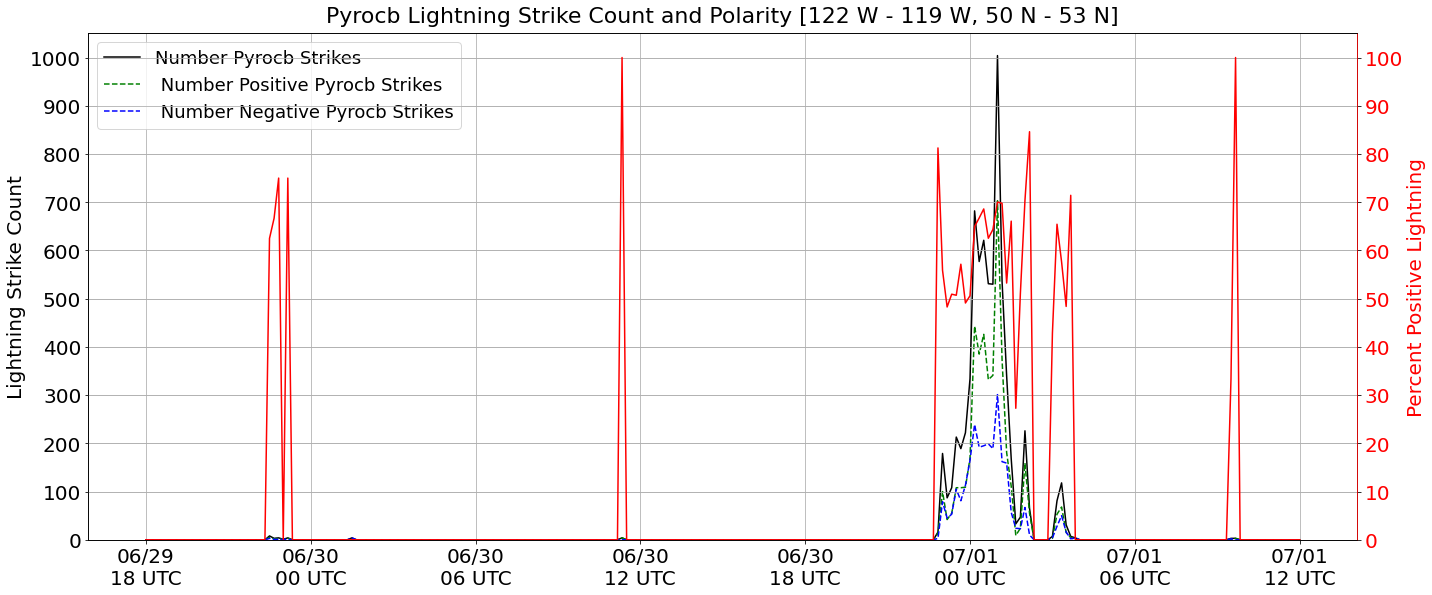

In [33]:
##### total pyrocb strikes
#strikes_current_whole(whole_concat)[0]

# positive pyrocb strikes
#strikes_current_whole(whole_concat)[10]

# negative pyrocb strikes
#strikes_current_whole(whole_concat)[11]
from textwrap import wrap

a = strikes_current_whole(whole_concat)[0]
b = [item for sublist in a for item in sublist]
flat_num_strikes_pyrocb_whole = [item for sublist in b for item in sublist]

c = strikes_current_whole(whole_concat)[10]
d = [item for sublist in c for item in sublist]
flat_num_positive_pyrocb_whole = [item for sublist in d for item in sublist]

e = strikes_current_whole(whole_concat)[11]
f = [item for sublist in e for item in sublist]
flat_num_negative_pyrocb_whole = [item for sublist in f for item in sublist]

g = strikes_current_whole(whole_concat)[4]
h = [item for sublist in g for item in sublist]
flat_percent_pos_whole = [item for sublist in h for item in sublist]

fig,ax = plt.subplots(figsize=(20,8))

xValues = np.arange(0, 253, 1)
xticks = np.arange(0, 253, 36)
yticks = np.arange(0, 1050, 100)


ax.plot(xValues, flat_num_strikes_pyrocb_whole[108:361], "k-", label = "Number Pyrocb Strikes")
ax.plot(xValues, flat_num_positive_pyrocb_whole[108: 361], "g--", label = " Number Positive Pyrocb Strikes")
ax.plot(xValues, flat_num_negative_pyrocb_whole[108: 361], "b--", label = " Number Negative Pyrocb Strikes")

ax.set_ylim((0,1050))
ax.set_ylabel("Lightning Strike Count", fontsize = 20)
ax.legend(loc = "upper left", fontsize = 18)
ax.set_xticks(xticks)
ax.set_yticks(yticks)
labels = ["06/29 18 UTC", "06/30 00 UTC", "06/30 06 UTC", "06/30 12 UTC", "06/30 18 UTC",  
          "07/01 00 UTC", "07/01 06 UTC", "07/01 12 UTC"]
labels = ['\n'.join(wrap(l, 6)) for l in labels]
ax.set_xticklabels(labels, fontsize = 20)
ax.set_yticklabels(yticks, fontsize = 20)
plt.grid()


# twin object for two different y-axis on the sample plot
yticks2 = np.arange(0, 105, 10)
ax2=ax.twinx()
# make a plot with different y-axis using second axis object
ax2.plot(xValues, flat_percent_pos_whole[108:361], color="red")
ax2.set_ylabel("Percent Positive Lightning", color="red",fontsize=20)
ax2.set_yticks(yticks2)
ax2.set_yticklabels(yticks2, fontsize = 20,  color="red")
ax2.set_ylim((0,105))
ax2.spines['right'].set_color('red')


plt.grid()
plt.tight_layout()
plt.title("Pyrocb Lightning Strike Count and Polarity [122 W - 119 W, 50 N - 53 N]", y=1.01, fontsize = 22) 
plt.savefig("long_timeseries_lightningcount.png", bbox_inches = "tight", dpi = 500)

## limited time range  june 30 hour 21 to july 1 hour 5


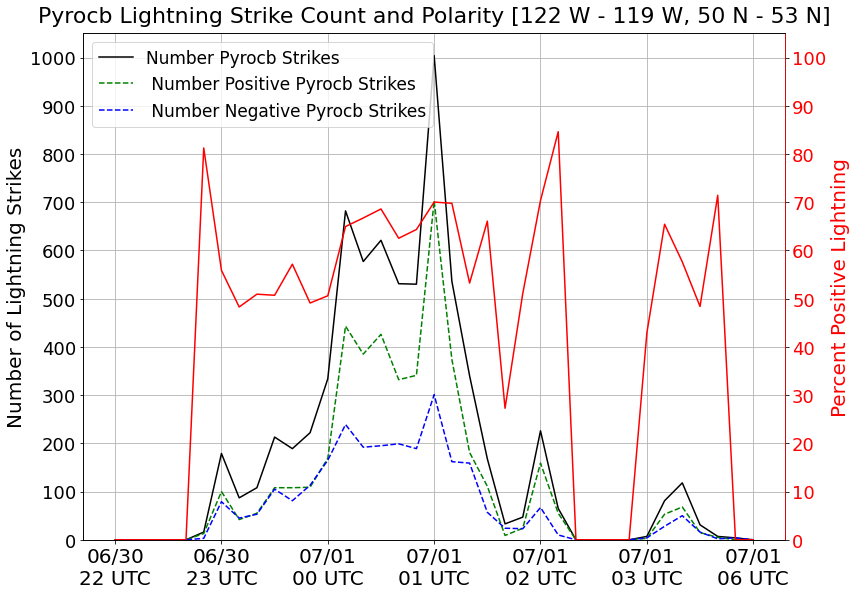

In [34]:
# june 30 hour 21 to july 1 hour 5
#plt.figure(figsize=(16,8))
fig,ax = plt.subplots(figsize=(12,8))

xValues = np.arange(0, 37, 1)
xticks = np.arange(0, 37, 6)
yticks = np.arange(0, 1050, 100)
# plt.plot(time (x axis), number of lightning strikes (y axis) , color and line style, label = "label")

ax.plot(xValues, flat_num_strikes_pyrocb[6:43], "k-", label = "Number Pyrocb Strikes")
ax.plot(xValues, flat_num_pos_current_pyrocb[6:43], "g--", label = " Number Positive Pyrocb Strikes")
ax.plot(xValues, flat_num_neg_current_pyrocb[6:43], "b--", label = " Number Negative Pyrocb Strikes")

ax.set_ylim((0,1050))
#ax.set_xlabel("Date and Time", fontsize = 18)
ax.set_ylabel("Number of Lightning Strikes", fontsize = 20)
ax.legend(loc = "upper left", fontsize = 17)
ax.set_xticks(xticks)
ax.set_yticks(yticks)
labels = ["06/30 22 UTC", "06/30 23 UTC", "07/01 00 UTC", 
          "07/01 01 UTC", "07/01 02 UTC", "07/01 03 UTC", "07/01 04 UTC"]
labels = ['\n'.join(wrap(l, 6)) for l in labels]
ax.set_xticklabels(labels, fontsize = 20)
ax.set_yticklabels(yticks, fontsize = 18)
plt.grid()

yticks2 = np.arange(0, 105, 10)

# twin object for two different y-axis on the sample plot
ax2=ax.twinx()
# make a plot with different y-axis using second axis object
ax2.plot(xValues, flat_percent_pos_pyrocb[6:43], color="red")
ax2.set_ylabel("Percent Positive Lightning", color="red",fontsize=20)
ax2.set_yticks(yticks2)
ax2.set_yticklabels(yticks2, fontsize = 18,  color="red")
ax2.set_ylim((0,105))
ax2.spines['right'].set_color('red')


#plt.grid()
plt.tight_layout()
plt.title("Pyrocb Lightning Strike Count and Polarity [122 W - 119 W, 50 N - 53 N]", y=1.01, fontsize = 22) 

plt.savefig("count_polarity_short_timeseries.png", bbox_inches = "tight", dpi = 500)


## typical thunderstorm 

## 06/28 00 UTC - 06/29 18 UTC

/tmp/ipykernel_326329/3014120694.py:91: RuntimeWarning: divide by zero encountered in log10
  log_num_neg_current_clima2[d,i,j] = np.log10(abs(num_neg_current_clima2[d,i,j]))/ np.log10(base)


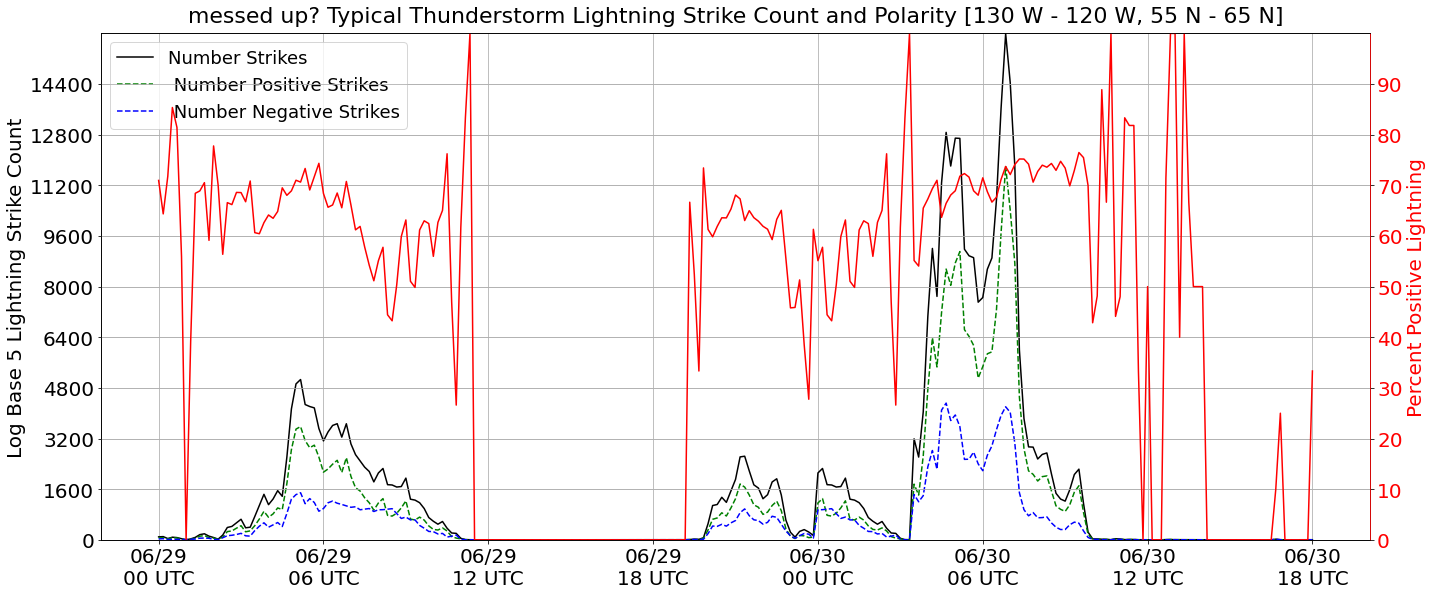

In [50]:

a = strikes_current_whole(whole_concat)[5]
b = [item for sublist in a for item in sublist]
flat_num_strikes_clima_whole = [item for sublist in b for item in sublist]

c = strikes_current_whole(whole_concat)[12]
d = [item for sublist in c for item in sublist]
flat_num_positive_clima_whole = [item for sublist in d for item in sublist]

e = strikes_current_whole(whole_concat)[13]
f = [item for sublist in e for item in sublist]
flat_num_negative_clima_whole = [item for sublist in f for item in sublist]

g = strikes_current_whole(whole_concat)[9]
h = [item for sublist in g for item in sublist]
flat_percent_pos_whole = [item for sublist in h for item in sublist]

fig,ax = plt.subplots(figsize=(20,8))

xValues = np.arange(0, 253, 1)
xticks = np.arange(0, 253, 36)
yticks = np.arange(0, 16000, 1600)
# plt.plot(time (x axis), number of lightning strikes (y axis) , color and line style, label = "label")

ax.plot(xValues, flat_num_strikes_clima_whole[0:253], "k-", label = "Number Strikes")
ax.plot(xValues, flat_num_positive_clima_whole[0: 253], "g--", label = " Number Positive Strikes")
ax.plot(xValues, flat_num_negative_clima_whole[0:253], "b--", label = " Number Negative Strikes")

ax.set_ylim((0,16000))
#ax.set_xlabel("Date and Time", fontsize = 20)
ax.set_ylabel("Log Base 5 Lightning Strike Count", fontsize = 20)
ax.legend(loc = "upper left", fontsize = 18)
ax.set_xticks(xticks)
ax.set_yticks(yticks)
labels = ["06/29 00 UTC", "06/29 06 UTC", "06/29 12 UTC", "06/29 18 UTC", 
          "06/30 00 UTC", "06/30 06 UTC", "06/30 12 UTC", "06/30 18 UTC"]
labels = ['\n'.join(wrap(l, 6)) for l in labels]
ax.set_xticklabels(labels, fontsize = 20)
ax.set_yticklabels(yticks, fontsize = 20)
# plt.yticks(fontsize = 18)
plt.grid()


# twin object for two different y-axis on the sample plot
yticks2 = np.arange(0, 100, 10)
ax2=ax.twinx()
# make a plot with different y-axis using second axis object
ax2.plot(xValues, flat_percent_pos_whole[0:253], color="red")
ax2.set_ylabel("Percent Positive Lightning", color="red",fontsize=20)
ax2.set_yticks(yticks2)
ax2.set_yticklabels(yticks2, fontsize = 20,  color="red")
ax2.set_ylim((0,100))
ax2.spines['right'].set_color('red')


plt.grid()
plt.tight_layout()
plt.title("messed up? Typical Thunderstorm Lightning Strike Count and Polarity [130 W - 120 W, 55 N - 65 N]", y=1.01, fontsize = 22) 
plt.savefig("typical_thunderstorm_timeseries.png", bbox_inches = "tight", dpi = 500)

# june 15 typical thunderstorm data
## need new function bc different region

In [36]:
E = read_mat('2021-06-15.mat')
df_e = pd.DataFrame(E['Events'], columns = ["year", "month", "day", "hour", "minute", "second", "lat", "lon", "peak-current", "j",  "k", "l", "m"])
june15 = df_e.loc[:, ~df_e.columns.isin(["j",  "k", "l", "m"])]
june15

,year,month,day,hour,minute,second,lat,lon,peak-current
0,2021.0,6.0,15.0,0.0,0.0,4.775769,60.426704,-122.636101,-17.0
1,2021.0,6.0,15.0,0.0,0.0,16.280730,58.630159,-126.292943,-7.0
2,2021.0,6.0,15.0,0.0,0.0,18.073931,55.473693,-123.073097,27.0
3,2021.0,6.0,15.0,0.0,0.0,26.737412,53.177333,-114.237687,-29.0
4,2021.0,6.0,15.0,0.0,0.0,26.820083,53.175622,-114.214396,-25.0
...,...,...,...,...,...,...,...,...,...
276379,2021.0,6.0,15.0,23.0,59.0,57.597017,58.852550,-112.762038,6.0
276380,2021.0,6.0,15.0,23.0,59.0,57.632213,58.886401,-112.753432,6.0
276381,2021.0,6.0,15.0,23.0,59.0,57.672931,58.892603,-112.635147,5.0
276382,2021.0,6.0,15.0,23.0,59.0,58.840413,58.842735,-112.469016,5.0


/home/elenadworak/anaconda3/envs/mynewenv/lib/python3.8/site-packages/pandas/core/arraylike.py:397: RuntimeWarning: invalid value encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)


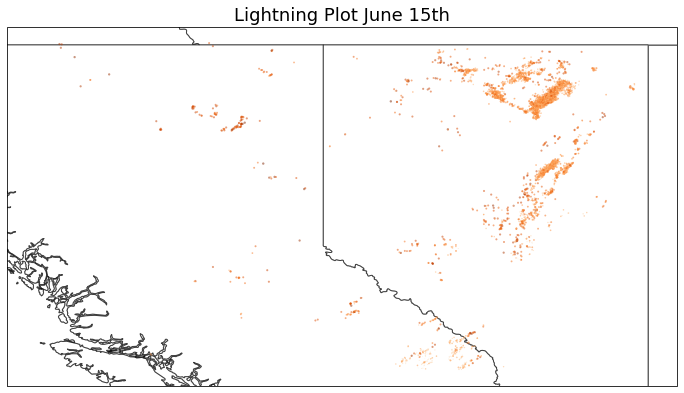

In [37]:
ax = plt.axes(projection=ccrs.PlateCarree())
ax.add_feature(cfeature.BORDERS, linestyle = '-', alpha = 0.5)
ax.add_feature(cfeature.COASTLINE, linestyle = '-', alpha = 0.5)
ax.add_feature(cfeature.STATES, linestyle = '-', alpha = 0.5, edgecolor="black")

# Make figure larger
plt.gcf().set_size_inches(12, 8)
# plt.xlim([-130, -110])
# plt.ylim([45, 63])

points = (june15.loc[(june15["peak-current"] != 0) & (june15["lat"] >= 50) & (june15["hour"] >= 18.0)]) # (june15["hour"] >= 18.0) & (june15["hour"] <= 23.0) & 

ax.scatter(x = points["lon"], y = points["lat"], c = np.log(points["peak-current"]), cmap="Oranges", s = np.log(points["peak-current"]), edgecolors="none", marker = 'o', alpha=0.5)

plt.xlabel("Latitude")
plt.ylabel("Longitude")
plt.title("Lightning Plot June 15th", fontsize = 18)
#plt.savefig("PyroCb_clima_0utc_3utc", dpi = 200)
plt.show()



In [38]:
hours = range(0, 24, 1)
mins = range(0, 60, 10)

num_strikes_clima3 = np.zeros((len(hours), len(mins)))
mean_current_clima3 = np.zeros((len(hours), len(mins)))
mean_pos_current_clima3 = np.zeros((len(hours), len(mins)))
mean_neg_current_clima3 = np.zeros((len(hours), len(mins)))
percent_pos_current_clima3 = np.zeros((len(hours),len(mins)))
num_pos_current_clima3 = np.zeros((len(hours), len(mins)))
num_neg_current_clima3 = np.zeros((len(hours), len(mins)))
log_num_strikes_clima3 = np.zeros((len(hours), len(mins)))
log_num_pos_current_clima3 = np.zeros((len(hours), len(mins)))
log_num_neg_current_clima3 = np.zeros((len(hours), len(mins)))

num_large_strikes_clima3 = np.zeros((len(hours), len(mins)))
num_pos_large_current_clima3 = np.zeros((len(hours), len(mins)))
num_neg_large_current_clima3 = np.zeros((len(hours), len(mins)))
percent_pos_large_current_clima3 = np.zeros((len(hours),len(mins)))

def strikes_current_june15(df):
    for i in range(len(hours)): 
        for j in range(len(mins)): 
            base = 5
            strikes_clima3 = df[(df["hour"] == hours[i]) & (df["minute"] >= mins[j]) & (df["minute"] <= mins[j] + 9) & (df["peak-current"] != 0)]

    ### climatology is log base 5
            if len(strikes_clima3) >= 1: 
                num_strikes_clima3[i,j] = len(strikes_clima3)
                num_large_strikes_clima3[i,j] = len(abs(strikes_clima3["peak-current"]) > 5)
                log_num_strikes_clima3[i,j] = np.log10(abs(num_strikes_clima3[i,j]))/ np.log10(base)

                #positive clima 
                mean_current_clima3[i,j] = (abs(strikes_clima3["peak-current"])).mean()
                
                pos_large_current_clima3 = strikes_clima3.loc[(strikes_clima3["peak-current"] > 5)]
                pos_current_clima3 = strikes_clima3.loc[(strikes_clima3["peak-current"] > 1)]

                num_pos_current_clima3[i,j] = len(pos_current_clima3)
                log_num_pos_current_clima3[i,j] = np.log10(abs(num_pos_current_clima3[i,j]))/ np.log10(base)

                mean_pos_current_clima3[i,j] = pos_current_clima3["peak-current"].mean()

                #negative clima
                neg_current_clima3 = strikes_clima3.loc[(strikes_clima3["peak-current"] < 0)]
                neg_large_current_clima3 = strikes_clima3.loc[(strikes_clima3["peak-current"] < - 5)]
                num_neg_current_clima3[i,j] = len(neg_current_clima3)
                log_num_neg_current_clima3[i,j] = np.log10(abs(num_neg_current_clima3[i,j]))/ np.log10(base)

                mean_neg_current_clima3[i,j] = neg_current_clima3["peak-current"].mean()

                #strikes_greater30_clima1 = strikes_clima1.loc[(strikes_clima1["peak-current"] > 30)]
                if len(strikes_clima3) > 1: 
                    percent_pos_large_current_clima3[i,j] = (num_pos_large_current_clima3[i,j] /  (num_pos_large_current_clima3[i,j] + num_neg_large_current_clima3[i,j])) * 100
                    percent_pos_current_clima3[i,j] = (num_pos_current_clima3[i,j] / (num_pos_current_clima3[i,j] + num_neg_current_clima3[i,j])) * 100


    return(num_strikes_clima3, mean_current_clima3, mean_pos_current_clima3, 
           mean_neg_current_clima3, percent_pos_current_clima3, 
           num_pos_current_clima3, num_neg_current_clima3, 
           log_num_strikes_clima3, log_num_pos_current_clima3, log_num_neg_current_clima3,
          num_large_strikes_clima3, num_pos_large_current_clima3, num_neg_large_current_clima3, percent_pos_large_current_clima3)


## typical thunderstorm

/tmp/ipykernel_326329/2931365788.py:53: RuntimeWarning: invalid value encountered in double_scalars
  percent_pos_large_current_clima3[i,j] = (num_pos_large_current_clima3[i,j] /  (num_pos_large_current_clima3[i,j] + num_neg_large_current_clima3[i,j])) * 100


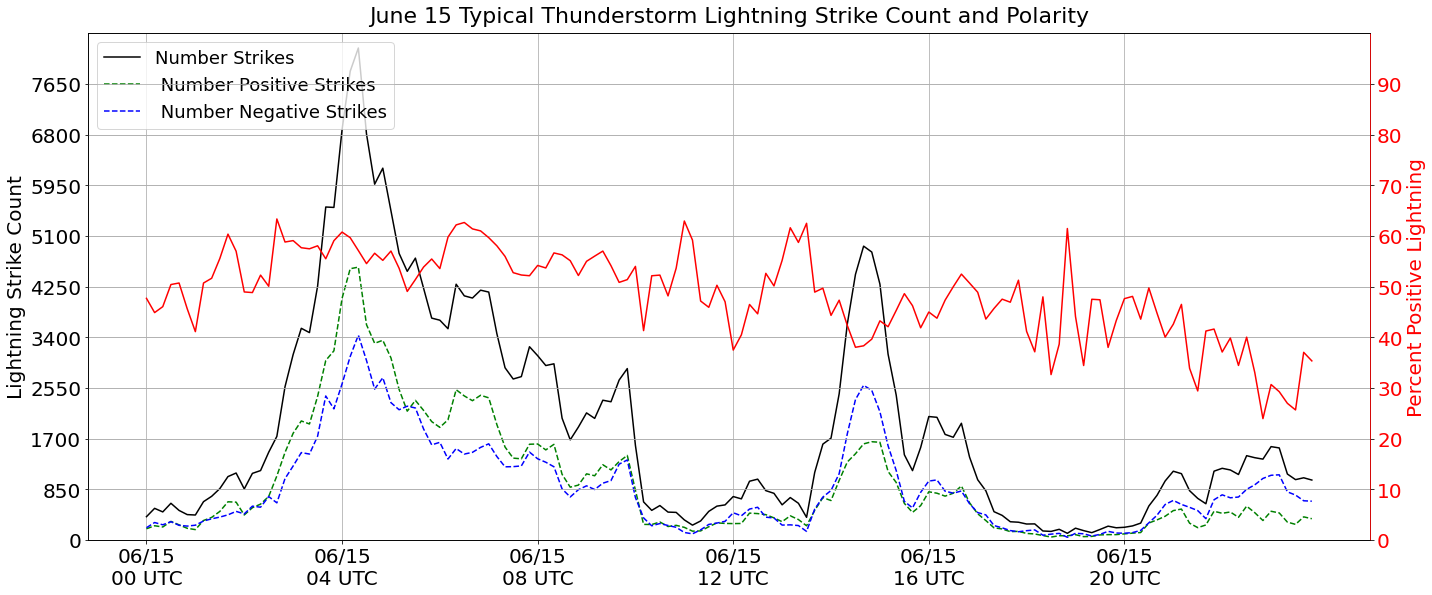

In [39]:
a = strikes_current_june15(june15)[0]
flat_num_strikes_nosmoke = [item for sublist in a for item in sublist]

c = strikes_current_june15(june15)[5]
flat_num_positive_nosmoke = [item for sublist in c for item in sublist]

e = strikes_current_june15(june15)[6]
flat_num_negative_nosmoke = [item for sublist in e for item in sublist]

g = strikes_current_june15(june15)[4]
flat_percent_pos_nosmoke = [item for sublist in g for item in sublist]

fig,ax = plt.subplots(figsize=(20,8))

xValues = np.arange(0, 144, 1)
xticks = np.arange(0, 144, 24)
yticks = np.arange(0, 8500, 850)

ax.plot(xValues, flat_num_strikes_nosmoke, "k-", label = "Number Strikes")
ax.plot(xValues, flat_num_positive_nosmoke, "g--", label = " Number Positive Strikes")
ax.plot(xValues, flat_num_negative_nosmoke, "b--", label = " Number Negative Strikes")

ax.set_ylim((0,8500))
#ax.set_xlabel("Date and Time", fontsize = 20)
ax.set_ylabel("Lightning Strike Count", fontsize = 20)
ax.legend(loc = "upper left", fontsize = 18)
ax.set_xticks(xticks)
ax.set_yticks(yticks)
labels = ["06/15 00 UTC", "06/15 04 UTC", "06/15 08 UTC", "06/15 12 UTC", 
          "06/15 16 UTC", "06/15 20 UTC"]
labels = ['\n'.join(wrap(l, 6)) for l in labels]
ax.set_xticklabels(labels, fontsize = 20)
ax.set_yticklabels(yticks, fontsize = 20)
plt.grid()


# twin object for two different y-axis on the sample plot
yticks2 = np.arange(0, 100, 10)
ax2=ax.twinx()
# make a plot with different y-axis using second axis object
ax2.plot(xValues, flat_percent_pos_nosmoke, color="red")
ax2.set_ylabel("Percent Positive Lightning", color="red",fontsize=20)
ax2.set_yticks(yticks2)
ax2.set_yticklabels(yticks2, fontsize = 20,  color="red")
ax2.set_ylim((0,100))
ax2.spines['right'].set_color('red')

plt.grid()
plt.tight_layout()
plt.title("June 15 Typical Thunderstorm Lightning Strike Count and Polarity", y=1.01, fontsize = 22) 
plt.savefig("typical_thunderstorm_june15.png", bbox_inches = "tight", dpi = 500)

# box plot 06/29 22:50 UTC - 07/01 02:20 

/tmp/ipykernel_326329/1420717076.py:28: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(labels, fontsize = 12)


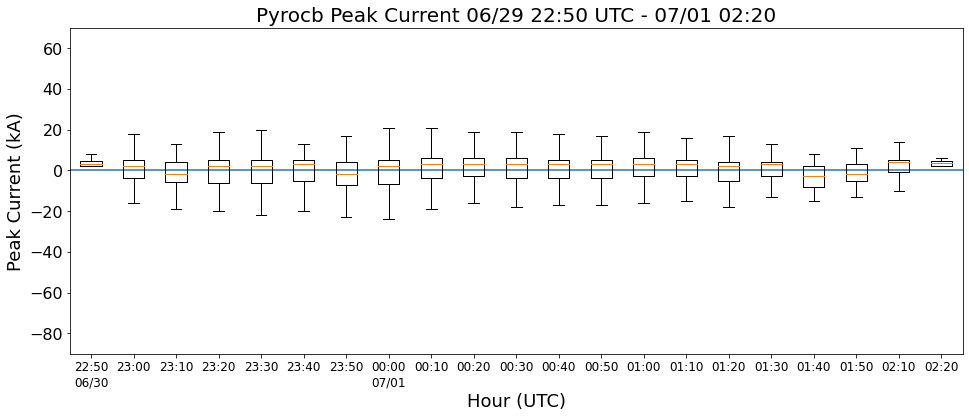

In [40]:
hours = [22.0, 23.0, 0.0, 1.0, 2.0]
mins = range(0, 60, 10)
array_pyrocb = []

for i in range(len(hours)): 
    for j in range(len(mins)): 
        time = june30_july1_concat[(june30_july1_concat["hour"] == hours[i]) & (june30_july1_concat["minute"] >= mins[j]) & (june30_july1_concat["minute"] <= mins[j] + 9)]
        data_pyrocb = (time.loc[(time.lon > -122) & (time.lon < -119) & (time.lat > 48) & (time.lat < 52)])
        # print(np.array(data_pyrocb["day"]))
        if len(data_pyrocb) > 1: 
            array_pyrocb.append(np.array(data_pyrocb["peak-current"]))

#fig, ax = plt.subplots(figsize = (16,8))
fig, ax = plt.subplots(figsize = (16,6))


ax.set_title('Pyrocb Peak Current 06/29 22:50 UTC - 07/01 02:20', fontsize = 20)
ax.set_ylabel("Peak Current (kA)", fontsize = 18)
ax.set_xlabel("Hour (UTC)", fontsize = 18)

labels = ["22:50 06/30", 
          "23:00", "23:10", "23:20", "23:30", "23:40", "23:50",
          "00:00 07/01","00:10", "00:20","00:30", "00:40", "00:50",
          "01:00","01:10", "01:20","01:30", "01:40", "01:50", 
          "02:10","02:20"]

labels = ['\n'.join(wrap(l, 6)) for l in labels]
ax.set_xticklabels(labels, fontsize = 12)

plt.yticks(fontsize = 16)
plt.ylim(-90, 70)

plt.axhline(y=0,  linestyle='-')

ax.boxplot(array_pyrocb, showfliers=False)
plt.savefig("boxplot_pyrocb.png",bbox_inches = "tight", dpi = 800)
plt.show()

# 22:50 - 2:10

## box plot typical thunderstorm 06/28 00 UTC - 06/29 18 UTC
- all_days_concat
- 06/28 00 UTC - 06/29 18 UTC

/tmp/ipykernel_326329/1856026753.py:31: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(labels, fontsize = 14)


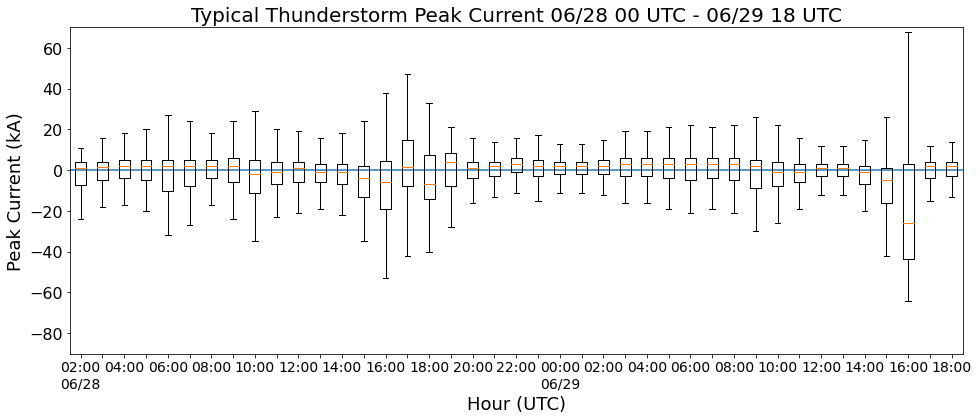

In [41]:
days = [28, 29]
hours = range(0, 24, 1)
#mins = range(0, 60, 10)

array_nosmoke = []
for i in range(len(days)):    
    for j in range(len(hours)): 
        time = all_days_concat[(all_days_concat["day"] == days[i]) & (all_days_concat["hour"] == hours[j])]
        #print(np.array(time))

        data_nosmoke = (time.loc[(time.lon > -130) & (time.lon < -100) & (time.lat > 53)])
        #print(np.array(data_nosmoke["hour"]))
        if len(data_nosmoke) > 1: 
            array_nosmoke.append(np.array(data_nosmoke["peak-current"]))
    array_nosmoke

fig, ax = plt.subplots(figsize = (16,6))

# xValues = np.arange(0, 40, 1)
# xticks = np.arange(0, 40, 6)
# ax.set_xticks(xticks)

ax.set_title('Typical Thunderstorm Peak Current 06/28 00 UTC - 06/29 18 UTC', fontsize = 20)
ax.set_ylabel("Peak Current (kA)", fontsize = 18)
ax.set_xlabel("Hour (UTC)", fontsize = 18)


labels = ["02:00 06/28", "", "04:00", "", "06:00", "","08:00","", "10:00", "", "12:00", "", "14:00", "","16:00", "", "18:00", "", "20:00", "","22:00", "",
           "00:00 06/29", "","02:00","","04:00","","06:00","", "08:00","", "10:00","", "12:00", "","14:00","", "16:00","", "18:00"]
labels = ['\n'.join(wrap(l, 6)) for l in labels]
ax.set_xticklabels(labels, fontsize = 14)
plt.ylim(-90, 70)
plt.yticks(fontsize = 16)
plt.axhline(y=0,  linestyle='-')

ax.boxplot(array_nosmoke[2:43], showfliers=False)
plt.savefig("boxplot_typical_2829.png",bbox_inches = "tight", dpi = 800)
plt.show()

# june 28 hour 2 - june 29 hour 23

## box plot typical thunderstorm june 15

/tmp/ipykernel_326329/2021249646.py:21: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(labels, fontsize = 16)


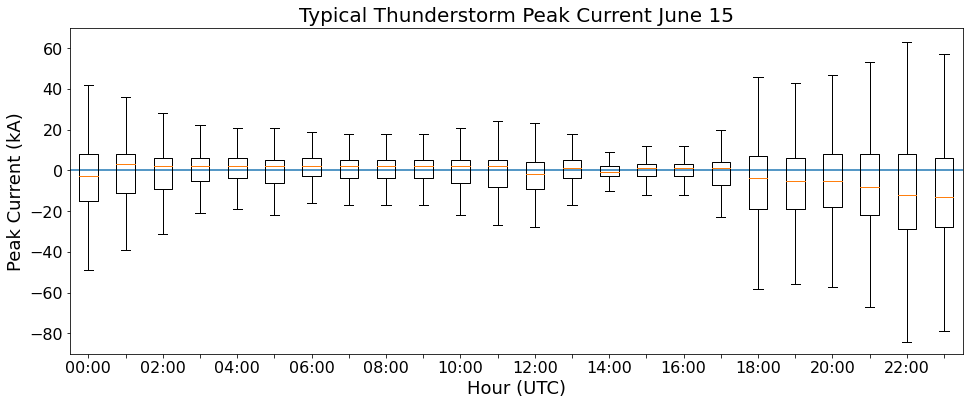

In [42]:

hours = range(0, 24, 1)
#mins = range(0, 60, 10)

array_june15 = []
   
for i in range(len(hours)): 
    data_june15 = june15[(june15["hour"] == hours[i])]
   # print(np.array(data_june15["hour"]))
    if len(data_june15) > 1: 
        array_june15.append(np.array(data_june15["peak-current"]))
array_june15
fig, ax = plt.subplots(figsize = (16,6))

ax.set_title('Typical Thunderstorm Peak Current June 15', fontsize = 20)
ax.set_ylabel("Peak Current (kA)", fontsize = 18)
ax.set_xlabel("Hour (UTC)", fontsize = 18)


labels = ["00:00", "", "02:00", "", "04:00", "", "06:00", "","08:00","", "10:00", "", "12:00", "", "14:00", "","16:00", "", "18:00", "", "20:00", "","22:00", ""]
labels = ['\n'.join(wrap(l, 6)) for l in labels]
ax.set_xticklabels(labels, fontsize = 16)
plt.ylim(-90, 70)

plt.yticks(fontsize = 16)
plt.axhline(y=0,  linestyle='-')

ax.boxplot(array_june15, showfliers=False)
plt.savefig("boxplot_typical_june15.png",bbox_inches = "tight", dpi = 800)
plt.show()

# june 28 hour 2 - june 29 hour 23

# BRIGHTNESS TEMPERATURE MATCHING

# plotting similar thunderstorm to pyrocb scale

## june 15 similar scale thunderstorm to pyrocb 

/tmp/ipykernel_326329/2674247925.py:24: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(labels, fontsize = 16)


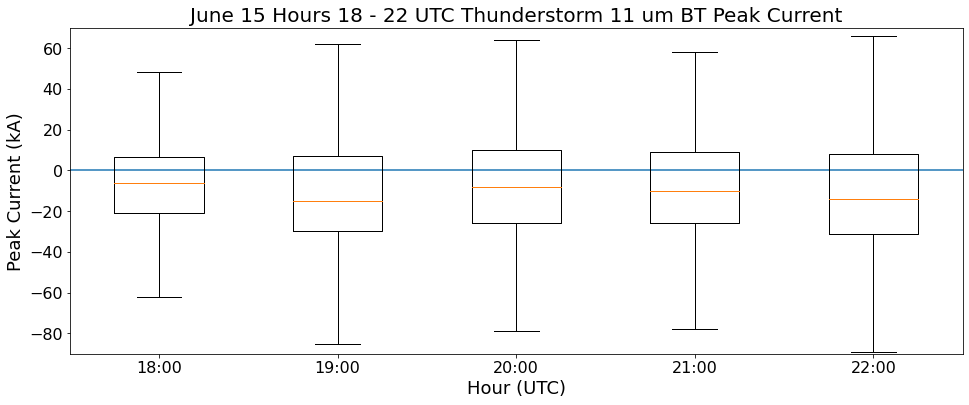

In [44]:

hours = range(0, 24, 1)


hour18 = june15[(june15["hour"] == 18) & (june15["lon"] >= -117)& (june15["lon"] <= -112) & (june15["lat"] >= 53) & (june15["lat"] <= 56)]
hour19 = june15[(june15["hour"] == 19) & (june15["lon"] >= -116.5)& (june15["lon"] <= -111) & (june15["lat"] >= 54) & (june15["lat"] <= 57)]
hour20 = june15[(june15["hour"] == 20) & (june15["lon"] >= -116)& (june15["lon"] <= -110) & (june15["lat"] >= 55) & (june15["lat"] <= 58)]
hour21 = june15[(june15["hour"] == 21) & (june15["lon"] >= -115.5)& (june15["lon"] <= -110) & (june15["lat"] >= 56) & (june15["lat"] <= 59)]
hour22 = june15[(june15["hour"] == 22) & (june15["lon"] >= -115)& (june15["lon"] <= -110) & (june15["lat"] >= 57) & (june15["lat"] <= 60)]



array_june15_BT = [np.array(hour18["peak-current"]), np.array(hour19["peak-current"]), np.array(hour20["peak-current"]), np.array(hour21["peak-current"]), np.array(hour22["peak-current"])]


fig, ax = plt.subplots(figsize = (16,6))

ax.set_title('June 15 Hours 18 - 22 UTC Thunderstorm 11 um BT Peak Current', fontsize = 20)
ax.set_ylabel("Peak Current (kA)", fontsize = 18)
ax.set_xlabel("Hour (UTC)", fontsize = 18)


labels = ["18:00", "19:00", "20:00", "21:00","22:00", "23:00"]
labels = ['\n'.join(wrap(l, 6)) for l in labels]
ax.set_xticklabels(labels, fontsize = 16)
plt.ylim(-90, 70)

plt.yticks(fontsize = 16)
plt.axhline(y=0,  linestyle='-')

ax.boxplot(array_june15_BT, showfliers=False)
plt.savefig("boxplot_11um_june15.png", dpi = 800)
plt.show()

# june 28 hour 2 - june 29 hour 23

## time series BT matching june 15

In [1]:
#pos_current_clima3 = strikes_clima3.loc[(strikes_clima3["peak-current"] > 1)]
#num_pos_current_clima3[i,j] = len(pos_current_clima3)


#strikes_june15_BT = [hour18["peak-current"], hour19["peak-current"], hour20["peak-current"], hour21["peak-current"], hour22["peak-current"]]
strikes_june15_BT = [len(hour18), len(hour19), len(hour20), len(hour21), len(hour22)]

print(strikes_june15_BT)

hour18_pos = hour18[(hour18["peak-current"] > 0)]
hour19_pos = hour19[(hour19["peak-current"] > 0)]
hour20_pos = hour20[(hour20["peak-current"] > 0)]
hour21_pos = hour21[(hour21["peak-current"] > 0)]
hour22_pos = hour22[(hour22["peak-current"] > 0)]

#positive_june15_BT = [hour18_pos["peak-current"], hour19_pos["peak-current"], hour20_pos["peak-current"], hour21_pos["peak-current"], hour22_pos["peak-current"]]
positive_june15_BT = [len(hour18_pos["peak-current"]), len(hour19_pos["peak-current"]), len(hour20_pos["peak-current"]), len(hour21_pos["peak-current"]), len(hour22_pos["peak-current"])]

hour18_neg = hour18[(hour18["peak-current"] < 0)]
hour19_neg = hour19[(hour19["peak-current"] < 0)]
hour20_neg = hour20[(hour20["peak-current"] < 0)]
hour21_neg = hour21[(hour21["peak-current"] < 0)]
hour22_neg = hour22[(hour22["peak-current"] < 0)]

#negitive_june15_BT = [hour18_neg["peak-current"], hour19_neg["peak-current"], hour20_neg["peak-current"], hour21_neg["peak-current"], hour22_neg["peak-current"]]
negative_june15_BT = [len(hour18_neg["peak-current"]), len(hour19_neg["peak-current"]), len(hour20_neg["peak-current"]), len(hour21_neg["peak-current"]), len(hour22_neg["peak-current"])]

percentpos_june15_BT = [(len(hour18_pos) / (len(hour18))) * 100, 
                         (len(hour19_pos) / (len(hour19))) * 100, 
                         (len(hour20_pos) / (len(hour20))) * 100, 
                         (len(hour21_pos) / (len(hour21))) * 100, 
                         (len(hour22_pos) / (len(hour22))) * 100]



NameError: name 'hour18' is not defined

Text(0.5, 1.01, 'June 15 Typical Thunderstorm Lightning Strike Count and Polarity')

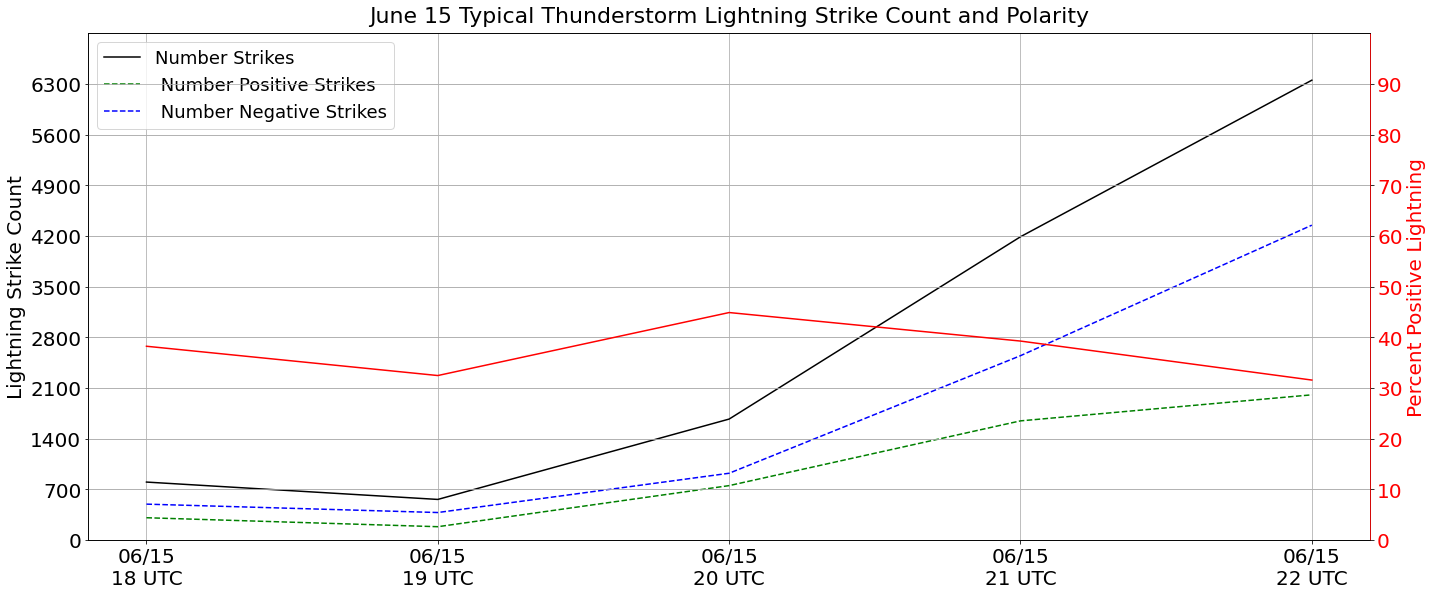

In [46]:
# hour18, hour19, hour20, hour21, hour22

fig,ax = plt.subplots(figsize=(20,8))

xValues = np.arange(0, 5, 1)
xticks = np.arange(0, 5, 1)
yticks = np.arange(0, 7000, 700)

ax.plot(xValues, strikes_june15_BT, "k-", label = "Number Strikes")
ax.plot(xValues, positive_june15_BT, "g--", label = " Number Positive Strikes")
ax.plot(xValues, negative_june15_BT, "b--", label = " Number Negative Strikes")

ax.set_ylim((0,7000))
ax.set_ylabel("Lightning Strike Count", fontsize = 20)
ax.legend(loc = "upper left", fontsize = 18)
ax.set_xticks(xticks)
ax.set_yticks(yticks)
labels = ["06/15 18 UTC", "06/15 19 UTC", "06/15 20 UTC", "06/15 21 UTC", "06/15 22 UTC"]
labels = ['\n'.join(wrap(l, 6)) for l in labels]
ax.set_xticklabels(labels, fontsize = 20)
ax.set_yticklabels(yticks, fontsize = 20)
plt.grid()


# twin object for two different y-axis on the sample plot
yticks2 = np.arange(0, 100, 10)
ax2=ax.twinx()
# make a plot with different y-axis using second axis object
ax2.plot(xValues, percentpos_june15_BT, color="red")
ax2.set_ylabel("Percent Positive Lightning", color="red",fontsize=20)
ax2.set_yticks(yticks2)
ax2.set_yticklabels(yticks2, fontsize = 20,  color="red")
ax2.set_ylim((0,100))
ax2.spines['right'].set_color('red')

plt.grid()
plt.tight_layout()
plt.title("June 15 Typical Thunderstorm Lightning Strike Count and Polarity", y=1.01, fontsize = 22) 
# plt.savefig("typical_thunderstorm_june15.png", bbox_inches = "tight", dpi = 500)

## june 29 similar scale to pyrocb
### June 29 8 - 12 UTC -120 W : -112 W, 57.5 N : 62 N 


/tmp/ipykernel_326329/1217758607.py:18: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(labels, fontsize = 16)


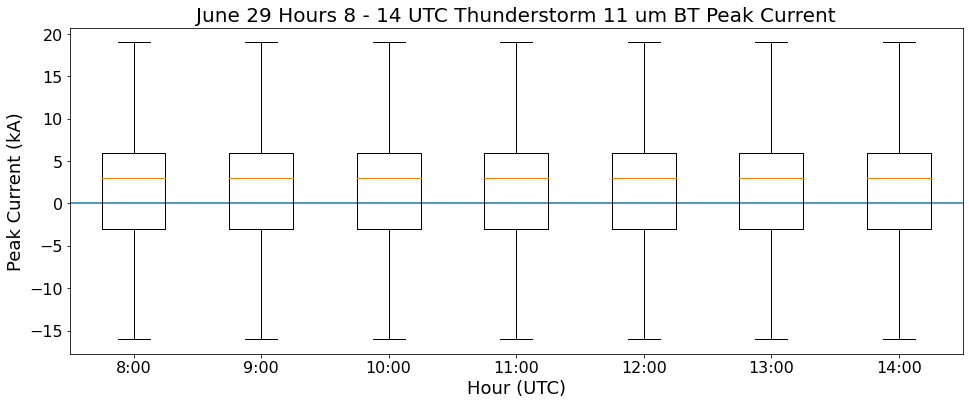

In [47]:

hours = range(8, 15, 1)

array_june29_BT = []

for i in range(len(hours)): 
    points = june29[(june29["hour"] == 8 + i) & (june29["lon"] >= -120) & (june29["lon"] <= -112) & (june29["lat"] >= 57.5) & (june29["lat"] <= 62) ]
    array_june29_BT.append(points["peak-current"])

fig, ax = plt.subplots(figsize = (16,6))

ax.set_title('June 29 Hours 8 - 14 UTC Thunderstorm 11 um BT Peak Current', fontsize = 20)
ax.set_ylabel("Peak Current (kA)", fontsize = 18)
ax.set_xlabel("Hour (UTC)", fontsize = 18)


labels = ["8:00", "9:00", "10:00", "11:00","12:00", "13:00", "14:00"]
labels = ['\n'.join(wrap(l, 6)) for l in labels]
ax.set_xticklabels(labels, fontsize = 16)
#plt.ylim(-90, 70)

plt.yticks(fontsize = 16)
plt.axhline(y=0,  linestyle='-')

ax.boxplot(array_june29_BT, showfliers=False)
plt.savefig("boxplot_11um_june29.png", dpi = 800)
plt.show()

# june 28 hour 2 - june 29 hour 23

## time series smoke region
- strikes_current_whole 
- 20: num_strikes_smoke
- 21: mean_current_smoke
- 22: num_pos_current_smoke
- 23: mean_pos_current_smoke
- 24: num_neg_current_smoke
- 25: percent_pos_current_smoke



/tmp/ipykernel_326329/3014120694.py:91: RuntimeWarning: divide by zero encountered in log10
  log_num_neg_current_clima2[d,i,j] = np.log10(abs(num_neg_current_clima2[d,i,j]))/ np.log10(base)


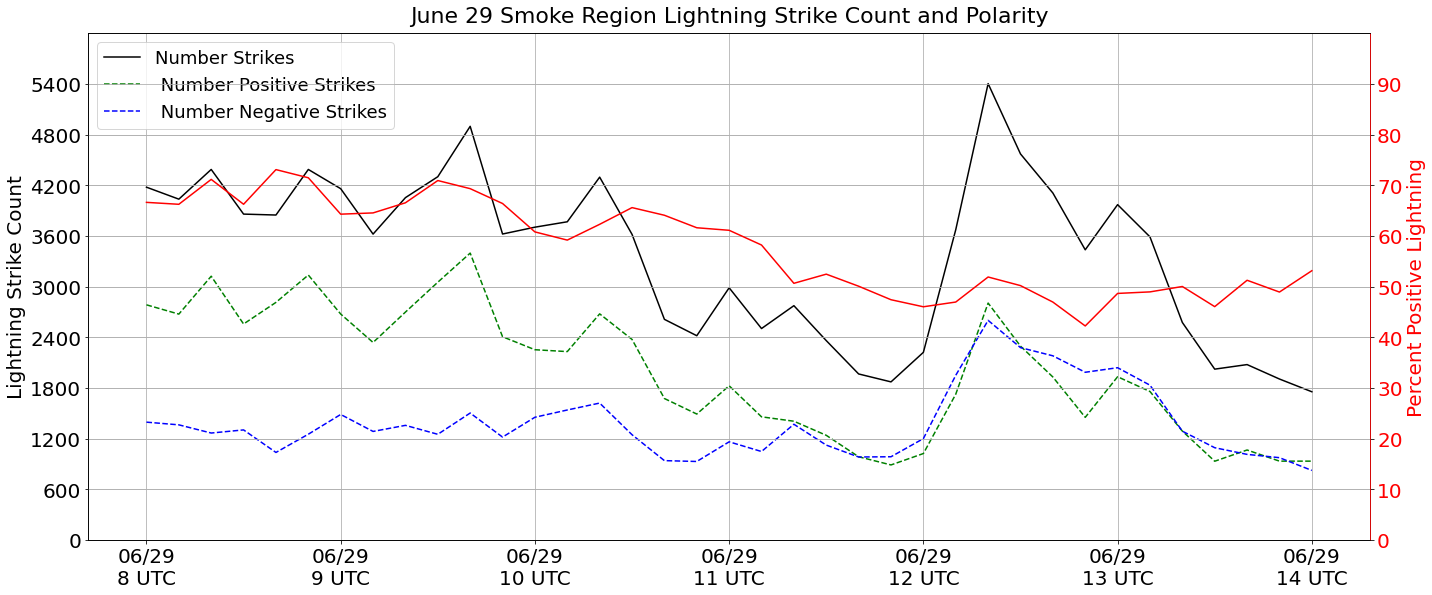

In [48]:
# hour 8 - 14


a = strikes_current_whole(june29)[20]
b = [item for sublist in a for item in sublist]
flat_num_strikes_smoke = [item for sublist in b for item in sublist]
#print(strikes_current_whole(all_days_concat[20]))

b = strikes_current_whole(june29)[22]
c = [item for sublist in b for item in sublist]
flat_positive_strikes_smoke = [item for sublist in c for item in sublist]

d = strikes_current_whole(june29)[24]
e = [item for sublist in d for item in sublist]
flat_negative_strikes_smoke = [item for sublist in e for item in sublist]

f = strikes_current_whole(june29)[25]
g = [item for sublist in f for item in sublist]
flat_percentpos_smoke = [item for sublist in g for item in sublist]

fig,ax = plt.subplots(figsize=(20,8))

xValues = np.arange(0, 37, 1)
xticks = np.arange(0, 37, 6)
yticks = np.arange(0, 6000, 600)

ax.plot(xValues, flat_num_strikes_smoke[48:85], "k-", label = "Number Strikes")
ax.plot(xValues, flat_positive_strikes_smoke[48:85], "g--", label = " Number Positive Strikes")
ax.plot(xValues, flat_negative_strikes_smoke[48:85], "b--", label = " Number Negative Strikes")

ax.set_ylim((0,6000))
ax.set_ylabel("Lightning Strike Count", fontsize = 20)
ax.legend(loc = "upper left", fontsize = 18)
ax.set_xticks(xticks)
ax.set_yticks(yticks)
labels = ["06/29 8 UTC", "06/29 9 UTC", "06/29 10 UTC", "06/29 11 UTC", "06/29 12 UTC", "06/29 13 UTC", "06/29 14 UTC"]
labels = ['\n'.join(wrap(l, 6)) for l in labels]
ax.set_xticklabels(labels, fontsize = 20)
ax.set_yticklabels(yticks, fontsize = 20)
plt.grid()


# twin object for two different y-axis on the sample plot
yticks2 = np.arange(0, 100, 10)
ax2=ax.twinx()
# make a plot with different y-axis using second axis object
ax2.plot(xValues, flat_percentpos_smoke[48:85], color="red")
ax2.set_ylabel("Percent Positive Lightning", color="red",fontsize=20)
ax2.set_yticks(yticks2)
ax2.set_yticklabels(yticks2, fontsize = 20,  color="red")
ax2.set_ylim((0,100))
ax2.spines['right'].set_color('red')

plt.grid()
plt.tight_layout()
plt.title("June 29 Smoke Region Lightning Strike Count and Polarity", y=1.01, fontsize = 22) 
plt.savefig("smoke_timeseries_june29.png", bbox_inches = "tight", dpi = 500)